# CHNG2021 RNAseq Mutation Calling

## Description

Describe the data / analysis goals.

# Register dataShop [env:bashtools]

## Verifications

In [14]:
echo "dataShop location"
pwd
echo "repository status"
df -h .
echo "dataShop size"
du -sh .
echo "Groups you belong to"
groups

dataShop location
/data1/jmcarter/JMC.hg38.CHNG2020_mutations
repository status
Filesystem      Size  Used Avail Use% Mounted on
/dev/nvme0n1p5  954G  846G  108G  89% /data1
dataShop size
409G	.
Groups you belong to
jmcarter datascigroup


## Input metadata

In the next cell:
1. Enter a **Memorable Description**. No spaces or special characters allowed!
2. Enter a **Version Number** 0-100, if you are making changes to an existing dataShop.
3. Enter the **Permission Group** to grant access privileges, please check with admin if uncertain.
4. Enter the appropriate **Access Level** for your data (1, 2, 3 or 4).

In [1]:
#dataShop permissions
shdesc="CHNG2021_mutations" #no spaces, only underscores allowed.
versid=0 #0-100
accgrp=datascigroup #input Permission Group with access privileges
acclvl=2 #1:OPEN/2:RESTRICTED/3:CONFIDENTIAL/4:CLASSIFIED

5. **Run** the next cell to register and set appropriate dataShop permissions

In [2]:
#configure dataShop
lockfile="shop.data"
foldnm="$(basename $PWD)" #folder name
if [[ -f "$lockfile" ]]; then
    echo "Previous dataShop configuration detected"
    cat $lockfile
    echo ""
    read -r shopid iversid iauthor ishdesc iaccgrp iacclvl < $lockfile
    if [[ -z "$versid" ]]; then versid=$iversid ; fi
    if [[ -z "$shdesc" ]]; then shdesc=$ishdesc ; fi
    if [[ -z "$accgrp" ]]; then accgrp=$iaccgrp ; fi
    if [[ -z "$acclvl" ]]; then acclvl=$iacclvl ; fi
else
    epoch=$(date "+%s")
    b36arr=(0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z)
    shopid=$(for i in $(echo "obase=36; $epoch"| bc); do echo -n ${b36arr[${i#0}]}; done)
fi
#sanitize variables
acclvl=${acclvl//[!1-4]/}
accgrp=${accgrp//[^[:alnum:]_]/}
versid=${versid//[!0-9]/}
shdesc=${shdesc//[^[:alnum:]_]/}
#setting permissions and lock file
if [[ -z "$accgrp" || -z "$acclvl" || -z "$shopid" || -z "$versid" || -z "$shdesc" ]]
then
    echo "Metadata missing or failed checks, please set appropriately"
else
    if id -nGz "$USER" | grep -qzxF "$accgrp" 
    then
        echo User \`$USER\' belongs to group \`$accgrp\'
        case $acclvl in
        1)
            echo "Classification Level 1: OPEN"
            echo "Enabling access for Others on ${foldnm}"
            echo "Enabling access for ${accgrp} on ${foldnm}"
            chmod go=rx $PWD
            chgrp $accgrp $PWD
            ;;
        2 | 3 | 4)
            echo "Classification Level ${acclvl}: RESTRICTED"
            echo "Disabling access for Others on ${foldnm}"
            echo "Enabling access for ${accgrp} on ${foldnm}"
            chmod g=rx,o= $PWD
            chgrp $accgrp $PWD
            ;;
        *)
            echo "Classification Level ${acclvl}: INVALID"
            echo "Please specify a correct classification level"
            return
            ;;
        esac
        echo "Building dataShop ${shopid} version ${versid} at ${foldnm}"
        mkdir -p depo #new files received that cannot be imported
        mkdir -p reco #record datashop versions here
        mkdir -p "reco/v${versid}/reqs" #requirements to run (new environment)
        mkdir -p "reco/v${versid}/impo" #importable local files
        mkdir -p "reco/v${versid}/expo" #deposited/generated files shared externally
        mkdir -p "reco/v${versid}/temp" #temporary storage
        mkdir -p "reco/v${versid}/prod" #data output folder
        mkdir -p "reco/v${versid}/logs" #output logs folder
        mkdir -p "reco/v${versid}/plot" #figure output folder
        ln -frsn depo "reco/v${versid}/depo"
        ln -frsn "reco/v${versid}/reqs" reqs
        ln -frsn "reco/v${versid}/impo" impo
        ln -frsn "reco/v${versid}/expo" expo
        ln -frsn "reco/v${versid}/temp" temp
        ln -frsn "reco/v${versid}/prod" prod
        ln -frsn "reco/v${versid}/logs" logs
        ln -frsn "reco/v${versid}/plot" plot
        ls -l
        echo "Registering dataShop"
        printf "${shopid} ${versid} ${USER} ${shdesc} ${accgrp} ${acclvl}" > $lockfile
        echo "This dataShop (v${versid}) can be accessed at:"
        echo "/data/shop/acc${shopid}.${USER}/v${versid}"
        datamall="/data/mall/${USER}/acc${shopid}"
        datashop="/data/shop/acc${shopid}.${USER}"
        ln -fsn "${PWD}/reco" "$datamall"
        ln -fsn "${PWD}/reco" "$datashop"
    else
        echo User \`$USER\' does not belong to group \`$accgrp\'
        echo Ensure correct spelling and consult your administrator.
    fi
fi

Previous dataShop configuration detected
RLIWQH 0 jmcarter CHNG2021_mutations datascigroup 2
User `jmcarter' belongs to group `datascigroup'
Classification Level 2: RESTRICTED
Disabling access for Others on RLIWQH.JMC.hg38.CHNG2020_mutations
Enabling access for datascigroup on RLIWQH.JMC.hg38.CHNG2020_mutations
Building dataShop RLIWQH version 0 at RLIWQH.JMC.hg38.CHNG2020_mutations
total 3392
-rw-rw-r-- 1 jmcarter jmcarter 3465378 Apr 17 14:23 CHNG2021_mutations.ipynb
drwxrwxr-x 2 jmcarter jmcarter      22 Nov 18 14:19 depo
lrwxrwxrwx 1 jmcarter jmcarter      12 Apr 17 14:25 expo -> reco/v0/expo
lrwxrwxrwx 1 jmcarter jmcarter      12 Apr 17 14:25 impo -> reco/v0/impo
lrwxrwxrwx 1 jmcarter jmcarter      12 Apr 17 14:25 logs -> reco/v0/logs
lrwxrwxrwx 1 jmcarter jmcarter      12 Apr 17 14:25 plot -> reco/v0/plot
lrwxrwxrwx 1 jmcarter jmcarter      12 Apr 17 14:25 prod -> reco/v0/prod
drwxrwxr-x 3 jmcarter jmcarter      16 Nov 18 11:08 reco
lrwxrwxrwx 1 jmcarter jmcarter      12 Apr 17 1

## Requirements

Use `conda env export > reqs/custom_env.yml` or `conda list --explicit > reqs/custom_env.txt` to save information about required tools to re-run dataShop.

In [ ]:
conda env export > reqs/custom_env.yml

In [80]:
ls -l reqs

ls: cannot access 'reqs': No such file or directory


: 2

## Deposits
Deposit any new data in the `depo` folder. Use `rsync` or Grsync (GUI version).

### Loci targeted for mutations

Underexpression / LOF
- TRAF2
- TRAF3
- BIRC2
- BIRC3
- CYLD
- NFKB2  

Overexpression / GOF
- NIK
- TACI
- NFKB1
- CD40
- LTBR

In [4]:
printf "chr9\t136881911\t136926607\tTRAF2
chr14\t102777448\t102911500\tTRAF3
chr11\t102347210\t102378670\tBIRC2
chr11\t102317449\t102339403\tBIRC3
chr16\t50742049\t50801935\tCYLD
chr10\t102394109\t102402524\tNFKB2
chr17\t45263118\t45317029\tNIK_MAP3K14
chr17\t16929815\t16972118\tTACI_TNFRSF13B
chr4\t102501329\t102617302\tNFKB1
chr20\t46118270\t46129863\tCD40
chr12\t6375044\t6391571\tLTBR" | sort -k1,1 -k2,2n > depo/loci.bed

In [5]:
head -11 depo/loci.bed

chr10	102394109	102402524	NFKB2
chr11	102317449	102339403	BIRC3
chr11	102347210	102378670	BIRC2
chr12	6375044	6391571	LTBR
chr14	102777448	102911500	TRAF3
chr16	50742049	50801935	CYLD
chr17	16929815	16972118	TACI_TNFRSF13B
chr17	45263118	45317029	NIK_MAP3K14
chr20	46118270	46129863	CD40
chr4	102501329	102617302	NFKB1
chr9	136881911	136926607	TRAF2


In [12]:
mkdir -p depo/fastq

In [17]:
#runID / bioidID / TecRepID / Platform
printf "ERR2570844 MM01
ERR2570846 MM11
ERR2570848 MM12
ERR2570850 MM14
ERR2570852 MM02
ERR2570854 MM24
ERR2570856 MM25
ERR2570858 MM03
ERR2570860 MM05
ERR2570862 MM06
ERR2570863 MM08
ERR2570865 PB02
ERR2570866 PB03
ERR2570867 PB04
" > depo/ChIPseq.tsv

printf "ERR2570785 MM10 ERS2473189
ERR2570786 MM12 ERS2473190
ERR2570787 MM13 ERS2473191
ERR2570788 MM14 ERS2473192
ERR2570789 MM15 ERS2473193
ERR2570790 MM17 ERS2473194
ERR2570791 MM18 ERS2473195
ERR2570792 MM21 ERS2473196
ERR2570793 MM23 ERS2473197
ERR2570794 MM24 ERS2473198
ERR2570795 MM25 ERS2473199
ERR2570796 MM28 ERS2473200
ERR2570797 MM29 ERS2473201
ERR2570798 MM03 ERS2473202
ERR2570799 MM04 ERS2473203
ERR2570800 MM05 ERS2473204
ERR2570801 MM06 ERS2473205
ERR2570802 MM07 ERS2473206
ERR2570803 MM09 ERS2473207
ERR2570780 PB01 ERS2473184
ERR2570781 PB02 ERS2473185
ERR2570782 PB03 ERS2473186
" > depo/RNAseq.tsv

In [18]:
head depo/*.tsv

==> depo/ChIPseq.tsv <==
ERR2570844 MM01
ERR2570846 MM11
ERR2570848 MM12
ERR2570850 MM14
ERR2570852 MM02
ERR2570854 MM24
ERR2570856 MM25
ERR2570858 MM03
ERR2570860 MM05
ERR2570862 MM06

==> depo/RNAseq.tsv <==
ERR2570785 MM10 ERS2473189
ERR2570786 MM12 ERS2473190
ERR2570787 MM13 ERS2473191
ERR2570788 MM14 ERS2473192
ERR2570789 MM15 ERS2473193
ERR2570790 MM17 ERS2473194
ERR2570791 MM18 ERS2473195
ERR2570792 MM21 ERS2473196
ERR2570793 MM23 ERS2473197
ERR2570794 MM24 ERS2473198


In [13]:
ls -l depo

total 4
drwxrwxr-x 2 jmcarter jmcarter   6 Nov 18 11:56 fastq
-rw-rw-r-- 1 jmcarter jmcarter 350 Nov 18 11:46 loci.bed


## Imports
Symlink any existing data to the `impo` folder.  
Use `ln -s /path/to/source impo/destination`.

In [9]:
mkdir -p impo/RNAseq

In [8]:
ls /data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/*.ba{m,i}

/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_HC1_Spliced.sorted.bai
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_HC1_Spliced.sorted.bam
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_HC2_Spliced.sorted.bai
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_HC2_Spliced.sorted.bam
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_HC3_Spliced.sorted.bai
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_HC3_Spliced.sorted.bam
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_MM01_Spliced.sorted.bai
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_MM01_Spliced.sorted.bam
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_MM03_Spliced.sorted.bai
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_MM03_Spliced.sorted.bam
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_MM05_Spliced.sorted.bai
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/QT21L6.JMC_MM05_Spliced.sorted.bam
/data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/Q

In [10]:
ln -s /data/shop/accQW6BRO.jmcarter/v0/depo/RNAseq/*.ba{m,i} impo/RNAseq/

In [11]:
mkdir -p impo/fastq

In [17]:
ln -s /data/shop/accQSOSLC.jmcarter/v0/depo/*.fq.gz impo/fastq/

In [18]:
ln -s /data/shop/accQSOSLC.jmcarter/v0/depo/RNAseq.tsv impo/

In [19]:
ln -s /data/shop/accQUB6ZR.jmcarter/v38/depo/hg38_GENCODE_primary_assembly_genome.fa impo/

In [20]:
ln -s /data/shop/accQUB6ZR.jmcarter/v38/depo/hg38_GENCODE_primary_assembly_genome.fa.fai impo/

In [21]:
ln -s /data/shop/accRK1S79.jmcarter/v0/prod/*.gnomad.genomes.v3.1.2.sites.9X.vcf.* impo/

In [22]:
ln -s /data/shop/accRKEROE.jmcarter/v0/depo/funcotator_dataSources.v1.7.20200521s impo/

In [9]:
ln -s /data/shop/accRK1S79.jmcarter/v0/depo/Homo_sapiens_assembly38.dbsnp138.vcf impo/
ln -s /data/shop/accRK1S79.jmcarter/v0/depo/Homo_sapiens_assembly38.dbsnp138.vcf.idx impo/
ln -s /data/shop/accRK1S79.jmcarter/v0/depo/Mills_and_1000G_gold_standard.indels.hg38.vcf.gz impo/
ln -s /data/shop/accRK1S79.jmcarter/v0/depo/Mills_and_1000G_gold_standard.indels.hg38.vcf.gz.tbi impo/
ln -s /data/shop/accRK1S79.jmcarter/v0/depo/Homo_sapiens_assembly38.known_indels.vcf.gz impo/
ln -s /data/shop/accRK1S79.jmcarter/v0/depo/Homo_sapiens_assembly38.known_indels.vcf.gz.tbi impo/

ln: failed to create symbolic link 'impo/Mills_and_1000G_gold_standard.indels.hg38.vcf.gz': File exists
ln: failed to create symbolic link 'impo/Mills_and_1000G_gold_standard.indels.hg38.vcf.gz.tbi': File exists


In [10]:
ls -l impo/

total 40
lrwxrwxrwx 1 jmcarter jmcarter    82 Nov 18 14:58 AFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz -> /data/shop/accRK1S79.jmcarter/v0/prod/AFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz
lrwxrwxrwx 1 jmcarter jmcarter    86 Nov 18 14:58 AFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz.tbi -> /data/shop/accRK1S79.jmcarter/v0/prod/AFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz.tbi
lrwxrwxrwx 1 jmcarter jmcarter    84 Nov 18 14:58 BAAFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz -> /data/shop/accRK1S79.jmcarter/v0/prod/BAAFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz
lrwxrwxrwx 1 jmcarter jmcarter    88 Nov 18 14:58 BAAFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz.tbi -> /data/shop/accRK1S79.jmcarter/v0/prod/BAAFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz.tbi
drwxrwxr-x 2 jmcarter jmcarter  4096 Nov 18 14:56 fastq
lrwxrwxrwx 1 jmcarter jmcarter    75 Nov 18 14:58 funcotator_dataSources.v1.7.20200521s -> /data/shop/accRKEROE.jmcarter/v0/depo/funcotator_dataSources.v1.7.20200521s
-rw-rw-r-- 1 jmcarte

## Exports

Data generated in the dataShop to be shared externally can be symlinked here.  
Prefix with dataShop UID.  
e.g. `ln -rs proc/results.tsv expo/RAL2CG.0.JMC.results.tsv`

In [24]:
ls -l expo

total 0


---

WARNING: Upon launching custom bash kernels you may need to run this:

In [ ]:
bind 'set enable-bracketed-paste off'

---

# dataShop Code [env:my_env]

## Data Pre-Processing

In [12]:
gatk CreateSequenceDictionary --help

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar CreateSequenceDictionary --help
USAGE: CreateSequenceDictionary [arguments]

Creates a sequence dictionary for a reference sequence.  This tool creates a sequence dictionary file (with ".dict"
extension) from a reference sequence provided in FASTA format, which is required by many processing and analysis tools.
The output file contains a header but no SAMRecords, and the header contains only sequence records.<br /><br />The
reference sequence can be gzipped (both .fasta and .fasta.gz are supported).<h4>Usage example:</h4><pre>java -jar
picard.jar CreateSequenceDictionary \ <br />      R=reference.fasta \ <br />      O=reference.dict</pre><hr />
Version:4.3.0.0


Required Arg

: 4

In [1]:
gatk CreateSequenceDictionary \
    -R impo/hg38_GENCODE_primary_assembly_genome.fa

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar CreateSequenceDictionary -R impo/hg38_GENCODE_primary_assembly_genome.fa
INFO	2022-11-18 15:03:06	CreateSequenceDictionary	Output dictionary will be written in impo/hg38_GENCODE_primary_assembly_genome.dict
15:03:06.972 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Fri Nov 18 15:03:06 SGT 2022] CreateSequenceDictionary --REFERENCE impo/hg38_GENCODE_primary_assembly_genome.fa --TRUNCATE_NAMES_AT_WHITESPACE true --NUM_SEQUENCES 2147483647 --VERBOSITY INFO --QUIET false --VALIDATION_STRINGENCY STRICT --COMPRESSION_LEVEL 2 --MAX_RECORDS_IN_RAM 5000

In [1]:
samtools flagstat impo/RNAseq/QT21L6.JMC_HC1_Spliced.sorted.bam

400419021 + 0 in total (QC-passed reads + QC-failed reads)
101019477 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
357643504 + 0 mapped (89.32% : N/A)
299376398 + 0 paired in sequencing
149688199 + 0 read1
149688199 + 0 read2
238325810 + 0 properly paired (79.61% : N/A)
242248212 + 0 with itself and mate mapped
14357605 + 0 singletons (4.80% : N/A)
1327392 + 0 with mate mapped to a different chr
970447 + 0 with mate mapped to a different chr (mapQ>=5)


### Fix Read Groups

In [28]:
head -1 /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/*_1.fastq

==> /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/ERR2567066_1.fastq <==
@ERR2567066.1 HWI-ST1189:162:C7BCBACXX:1:1101:1224:2165 length=75

==> /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/ERR2567067_1.fastq <==
@ERR2567067.1 HWI-ST1189:162:C7BCBACXX:3:1101:1042:2180 length=75

==> /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/ERR2567068_1.fastq <==
@ERR2567068.1 HWI-ST1189:162:C7BCBACXX:3:1101:1107:2155 length=75

==> /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/ERR2567069_1.fastq <==
@ERR2567069.1 HWI-ST1189:162:C7BCBACXX:1:1101:1082:2171 length=75

==> /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/ERR2567070_1.fastq <==
@ERR2567070.1 HWI-ST1189:162:C7BCBACXX:2:1101:1172:2219 length=75

==> /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/ERR2567071_1.fastq <==
@ERR2567071.1 HWI-ST1189:162:C7BCBACXX:1:1101:1211:2177 length=75

==> /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/ERR2567072_1.fastq <==
@ERR2567072.1 HWI-ST1189:162:C7BCBACXX:1:1101:1032:2187 length=75

==> /data/shop/accQNJ5B3.jmcarter/depo/FASTQ/ERR2567073

In [2]:
declare -A bioid
while read -r run bio; do
    bioid[$run]="${bio}"
    echo "$run - ${bioid[$run]}"
done < impo/RNAseq.tsv

N050 - MM01
N073 - MM03
N094 - MM05
N099 - MM06
N112 - MM07
N198 - MM09
N201 - MM10
H1 - HC1
H2 - HC2
H3 - HC3


In [4]:
echo "${!bioid[@]}"

N073 N112 N050 N198 N094 N099 N201 H1 H3 H2


https://en.wikipedia.org/wiki/FASTQ_format#Illumina_sequence_identifiers

In [18]:
zcat impo/fastq/H1_1.fq.gz | head -1
zcat impo/fastq/H2_1.fq.gz | head -1
zcat impo/fastq/H3_1.fq.gz | head -1

@ST-E00192:1061:HFW23CCX2:2:1101:15037:1696 1:N:0:NATGTCTG+NTAAGTGG

gzip: stdout: Broken pipe
@ST-E00192:1061:HFW23CCX2:2:1101:9983:1696 1:N:0:NTGACCGT+NTGAGAGC

gzip: stdout: Broken pipe
@ST-E00192:1061:HFW23CCX2:2:1101:11201:1696 1:N:0:NGGTCATT+NTTGACGT

gzip: stdout: Broken pipe


In [19]:
declare -A grpid
declare -A tekid
for key in "${!bioid[@]}"; do
grpid[$key]=$(zcat "impo/fastq/${key}_1.fq.gz" | head -1 | awk 'BEGIN{OFS="\t"}NR==1{split($1, header, ":"); ID=header[3]"."header[4]; print ID}')
tekid[$key]=$(zcat "impo/fastq/${key}_1.fq.gz" | head -1 | awk 'BEGIN{OFS="\t"}NR==1{split($2, header, ":"); ID=header[4]; print ID}')
done


gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe

gzip: stdout: Broken pipe


In [22]:
echo "${bioid[@]}"
echo "${tekid[@]}"
echo "${grpid[@]}"

MM03 MM07 MM01 MM09 MM05 MM06 MM10 HC1 HC3 HC2
NTTATGCG+NCGGCTAT NTTGACAG+NGTATGGC NGCATTGA+NGTTACTG NCGTGCTT+NCGGATCT NCTCTATG+NTGCTAGC NTCGATGG+NTGCTGTA NTCGTGTA+NTAGGCTT NATGTCTG+NTAAGTGG NGGTCATT+NTTGACGT NTGACCGT+NTGAGAGC
HFW23CCX2.2 HFW23CCX2.2 HFW23CCX2.2 HFW23CCX2.2 HFW23CCX2.2 HFW23CCX2.2 HFW23CCX2.2 HFW23CCX2.2 HFW23CCX2.2 HFW23CCX2.2


In [16]:
gatk AddOrReplaceReadGroups --help

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar AddOrReplaceReadGroups --help
USAGE: AddOrReplaceReadGroups [arguments]

Assigns all the reads in a file to a single new read-group.

This tool accepts INPUT BAM and SAM files or URLs from the <a href="http://ga4gh.org/#/documentation">Global Alliance
for Genomics and Health (GA4GH)</a>.
<h3>Usage example:</h3>
java -jar picard.jar AddOrReplaceReadGroups \
I=input.bam \
O=output.bam \
RGID=4 \
RGLB=lib1 \
RGPL=ILLUMINA \
RGPU=unit1 \
RGSM=20

<h3>Caveats</h3>
The value of the tags must adhere (according to the <a
href="https://samtools.github.io/hts-specs/SAMv1.pdf">SAM-spec</a>) with the regex <code>'^[ -~]+$'</code> (one or more
characters from the ASCII range 32 through 1

: 4

In [23]:
ls impo/RNAseq/*.bam

impo/RNAseq/QT21L6.JMC_HC1_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_HC2_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_HC3_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_MM01_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_MM03_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_MM05_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_MM06_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_MM07_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_MM09_Spliced.sorted.bam
impo/RNAseq/QT21L6.JMC_MM10_Spliced.sorted.bam


In [24]:
# fix the read groups
for key in "${!bioid[@]}"; do
        echo "impo/RNAseq/${key}.bam"
        echo "prod/${key}_RG.bam"
        echo "${grpid[$key]}"
        echo "${tekid[$key]}"
        echo "${tekid[$key]}${grpid[$key]}"
        echo "${bioid[$key]}"
done

impo/RNAseq/N073.bam
prod/N073_RG.bam
HFW23CCX2.2
NTTATGCG+NCGGCTAT
NTTATGCG+NCGGCTATHFW23CCX2.2
MM03
impo/RNAseq/N112.bam
prod/N112_RG.bam
HFW23CCX2.2
NTTGACAG+NGTATGGC
NTTGACAG+NGTATGGCHFW23CCX2.2
MM07
impo/RNAseq/N050.bam
prod/N050_RG.bam
HFW23CCX2.2
NGCATTGA+NGTTACTG
NGCATTGA+NGTTACTGHFW23CCX2.2
MM01
impo/RNAseq/N198.bam
prod/N198_RG.bam
HFW23CCX2.2
NCGTGCTT+NCGGATCT
NCGTGCTT+NCGGATCTHFW23CCX2.2
MM09
impo/RNAseq/N094.bam
prod/N094_RG.bam
HFW23CCX2.2
NCTCTATG+NTGCTAGC
NCTCTATG+NTGCTAGCHFW23CCX2.2
MM05
impo/RNAseq/N099.bam
prod/N099_RG.bam
HFW23CCX2.2
NTCGATGG+NTGCTGTA
NTCGATGG+NTGCTGTAHFW23CCX2.2
MM06
impo/RNAseq/N201.bam
prod/N201_RG.bam
HFW23CCX2.2
NTCGTGTA+NTAGGCTT
NTCGTGTA+NTAGGCTTHFW23CCX2.2
MM10
impo/RNAseq/H1.bam
prod/H1_RG.bam
HFW23CCX2.2
NATGTCTG+NTAAGTGG
NATGTCTG+NTAAGTGGHFW23CCX2.2
HC1
impo/RNAseq/H3.bam
prod/H3_RG.bam
HFW23CCX2.2
NGGTCATT+NTTGACGT
NGGTCATT+NTTGACGTHFW23CCX2.2
HC3
impo/RNAseq/H2.bam
prod/H2_RG.bam
HFW23CCX2.2
NTGACCGT+NTGAGAGC
NTGACCGT+NTGAGAGCHFW23CCX2.2

In [26]:
# fix the read groups
for key in "${!bioid[@]}"; do
    gatk AddOrReplaceReadGroups \
        I="impo/RNAseq/QT21L6.JMC_${bioid[$key]}_Spliced.sorted.bam" \
        O="prod/${bioid[$key]}_RG.bam" \
        SORT_ORDER=coordinate \
        RGID="${grpid[$key]}" \
        RGLB="${tekid[$key]}" \
        RGPL=illumina \
        RGPU="${tekid[$key]}${grpid[$key]}" \
        RGSM="${bioid[$key]}" \
        CREATE_INDEX=True \
        VERBOSITY=WARNING
done

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar AddOrReplaceReadGroups I=impo/RNAseq/QT21L6.JMC_MM03_Spliced.sorted.bam O=prod/MM03_RG.bam SORT_ORDER=coordinate RGID=HFW23CCX2.2 RGLB=NTTATGCG+NCGGCTAT RGPL=illumina RGPU=NTTATGCG+NCGGCTATHFW23CCX2.2 RGSM=MM03 CREATE_INDEX=True VERBOSITY=WARNING
INFO	2022-11-18 15:51:07	AddOrReplaceReadGroups	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** 
https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    AddOrReplaceReadGroups -I impo/RNAseq/QT21L6.JMC_MM03_Sp

### Mark Duplicates

In [2]:
gatk MarkDuplicatesSpark --help

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar MarkDuplicatesSpark --help
USAGE: MarkDuplicatesSpark [arguments]

Marks duplicates on spark
Version:4.3.0.0


Required Arguments:

--input,-I <GATKPath>         BAM/SAM/CRAM file containing reads  This argument must be specified at least once.
                              Required. 

--output,-O <String>          the output bam  Required. 


Optional Arguments:

--add-output-vcf-command-line <Boolean>
                              If true, adds a command line header line to created VCF files.  Default value: true.
                              Possible values: {true, false} 

--arguments_file <File>       read one or more arguments files and add them to the command line  T

In [28]:
gatk --help


 Usage template for all tools (uses --spark-runner LOCAL when used with a Spark tool)
    gatk AnyTool toolArgs

 Usage template for Spark tools (will NOT work on non-Spark tools)
    gatk SparkTool toolArgs  [ -- --spark-runner <LOCAL | SPARK | GCS> sparkArgs ]

 Getting help
    gatk --list       Print the list of available tools

    gatk Tool --help  Print help on a particular tool

 Configuration File Specification
     --gatk-config-file                PATH/TO/GATK/PROPERTIES/FILE

 gatk forwards commands to GATK and adds some sugar for submitting spark jobs

   --spark-runner <target>    controls how spark tools are run
     valid targets are:
     LOCAL:      run using the in-memory spark runner
     SPARK:      run using spark-submit on an existing cluster 
                 --spark-master must be specified
                 --spark-submit-command may be specified to control the Spark submit command
                 arguments to spark-submit may optionally be specified after --

In [29]:
echo "${bioid[@]}"

MM03 MM07 MM01 MM09 MM05 MM06 MM10 HC1 HC3 HC2


In [31]:
ls prod/

HC1_RG.bai      HC2_RG.bam      MM01_RG.bai  MM06_RG.bai  MM10_RG.bai
HC1_RG.bam      HC3_MD.bam      MM01_RG.bam  MM06_RG.bam  MM10_RG.bam
HC2_MD.bam      HC3_MD.bam.bai  MM03_RG.bai  MM07_RG.bai
HC2_MD.bam.bai  HC3_MD.bam.sbi  MM03_RG.bam  MM07_RG.bam
HC2_MD.bam.sbi  HC3_RG.bai      MM05_RG.bai  MM09_RG.bai
HC2_RG.bai      HC3_RG.bam      MM05_RG.bam  MM09_RG.bam


In [36]:
gatk MarkDuplicatesSpark \
    -I prod/HC1_RG.bam \
    -O prod/HC1_MD.bam \
    --verbosity WARNING \
    && rm prod/HC1_RG.bam \
    && echo HC1 finished

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar MarkDuplicatesSpark -I prod/HC1_RG.bam -O prod/HC1_MD.bam --verbosity WARNING
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
22/11/21 14:58:14 INFO SparkContext: Running Spark version 2.4.5
22/11/21 14:58:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/11/21 14:58:14 INFO SparkContext: Submitted application: MarkDuplicatesSpark
22/11/21 14:58:14 INFO SecurityManager: Changing view acls to: jmcarter
22/11/21 14:58:14 INFO SecurityManager: Changing modify acls to: jmcarter
22/11/21 14:58:14 INFO SecurityManager: Changing view acls groups to: 
22/11/21 14:58:14 IN

In [37]:
samples=( MM03 MM07 MM01 MM09 MM05 MM06 MM10 HC3 HC2 )

In [39]:
for key in "${samples[@]}"; do
    echo $key
done

MM03
MM07
MM01
MM09
MM05
MM06
MM10
HC3
HC2


In [ ]:
# mark duplicates
for key in "${samples[@]}"; do
sem -j 2 "gatk MarkDuplicatesSpark \
            -I prod/${key}_RG.bam \
            -O prod/${key}_MD.bam \
            --verbosity WARNING \
          && rm prod/${key}_RG.bam \
          && echo ${key} finished"; echo "${key} submitted"
done
sem --wait

MM03 submitted
MM07 submitted
MM03 finished
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
22/11/21 15:39:05 INFO SparkContext: Running Spark version 2.4.5
22/11/21 15:39:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/11/21 15:39:05 INFO SparkContext: Submitted application: MarkDuplicatesSpark
22/11/21 15:39:05 INFO SecurityManager: Changing view acls to: jmcarter
22/11/21 15:39:05 INFO SecurityManager: Changing modify acls to: jmcarter
22/11/21 15:39:05 INFO SecurityManager: Changing view acls groups to: 
22/11/21 15:39:05 INFO SecurityManager: Changing modify acls groups to: 
22/11/21 15:39:05 INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users  with view permissions: Set(jmcarter); groups with view permissions: Set(); users  with modify permissions: Set(jmcarter); groups with modify permissions: Set()
22/11/21 15:39:05 INFO Utils: S

### Split N CIGAR Reads

In [7]:
gatk SplitNCigarReads --help

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar SplitNCigarReads --help
USAGE: SplitNCigarReads [arguments]

Splits reads that contain Ns in their cigar string (e.g. spanning splicing events).
Version:4.3.0.0


Required Arguments:

--input,-I <GATKPath>         BAM/SAM/CRAM file containing reads  This argument must be specified at least once.
                              Required. 

--output,-O <GATKPath>        Write output to this BAM filename  Required. 

--reference,-R <GATKPath>     Reference sequence file  Required. 


Optional Arguments:

--add-output-sam-program-record <Boolean>
                              If true, adds a PG tag to created SAM/BAM/CRAM files.  Default value: true. Possible
                     

In [32]:
sem -j 2 'sleep 1;echo 1 finished';   echo sem 1 exited
sem -j 2 'sleep 2;echo 2 finished';   echo sem 2 exited
sem -j 2 'sleep 3;echo 3 finished';   echo sem 3 exited
sem -j 2 'sleep 4;echo 4 finished';   echo sem 4 exited
sem --wait; echo sem --wait done

sem 1 exited
sem 2 exited
1 finished
sem 3 exited
2 finished
sem 4 exited
3 finished
4 finished
sem --wait done


In [10]:
for key in "${!bioid[@]}"; do
sem -j 2 "sleep 2; echo prod/${key}_MD.bam \
    complete"; echo "${key} submitted"
done
sem --wait

ERR2570798 submitted
ERR2570799 submitted
prod/ERR2570798_MD.bam complete
ERR2570794 submitted
prod/ERR2570799_MD.bam complete
ERR2570795 submitted
prod/ERR2570794_MD.bam complete
ERR2570796 submitted
prod/ERR2570795_MD.bam complete
ERR2570797 submitted
prod/ERR2570796_MD.bam complete
prod/ERR2570797_MD.bam complete
ERR2570790 submitted
ERR2570791 submitted
prod/ERR2570790_MD.bam complete
prod/ERR2570791_MD.bam complete
ERR2570792 submitted
ERR2570793 submitted
prod/ERR2570792_MD.bam complete
prod/ERR2570793_MD.bam complete
ERR2570800 submitted
ERR2570801 submitted
prod/ERR2570800_MD.bam complete
ERR2570802 submitted
prod/ERR2570801_MD.bam complete
ERR2570803 submitted
prod/ERR2570802_MD.bam complete
prod/ERR2570803_MD.bam complete
ERR2570789 submitted
ERR2570788 submitted
prod/ERR2570789_MD.bam complete
ERR2570787 submitted
prod/ERR2570788_MD.bam complete
ERR2570786 submitted
prod/ERR2570787_MD.bam complete
ERR2570785 submitted
prod/ERR2570786_MD.bam complete
ERR2570782 submitted
prod

In [43]:
echo "${bioid[@]}"

MM03 MM07 MM01 MM09 MM05 MM06 MM10 HC1 HC3 HC2


In [ ]:
for key in "${bioid[@]}"; do
sem -j 2 "gatk SplitNCigarReads \
      -R impo/hg38_GENCODE_primary_assembly_genome.fa \
      -I prod/${key}_MD.bam \
      -O prod/${key}_SN.bam \
      --verbosity WARNING \
      && rm prod/${key}_MD.bam \
      && echo ${key} finished"; echo "${key} submitted"
done
sem --wait

MM03 submitted
MM07 submitted
MM07 finished
13:17:24.279 WARN  IntelInflater - Zero Bytes Written : 0
16:59:47.872 WARN  IntelInflater - Zero Bytes Written : 0
[23 November, 2022 5:13:56 PM SGT] org.broadinstitute.hellbender.tools.walkers.rnaseq.SplitNCigarReads done. Elapsed time: 408.30 minutes.
Runtime.totalMemory()=12319719424
Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar SplitNCigarReads -R impo/hg38_GENCODE_primary_assembly_genome.fa -I prod/MM07_MD.bam -O prod/MM07_SN.bam --verbosity WARNING
MM01 submitted
MM03 finished
13:35:56.640 WARN  IntelInflater - Zero Bytes Written : 0
17:31:55.647 WARN  IntelInflater - Zero Bytes Written : 0
[23 November, 2022 5:42:02 PM SGT] org.broadinstitute.hellbender.tools.walkers.r

In [5]:
for f in prod/*.bam; do
    samtools view -H $f | grep '^@RG'
done

@RG	ID:HFW23CCX2.2	LB:NATGTCTG+NTAAGTGG	PL:illumina	SM:HC1	PU:NATGTCTG+NTAAGTGGHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NTGACCGT+NTGAGAGC	PL:illumina	SM:HC2	PU:NTGACCGT+NTGAGAGCHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NGGTCATT+NTTGACGT	PL:illumina	SM:HC3	PU:NGGTCATT+NTTGACGTHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NGCATTGA+NGTTACTG	PL:illumina	SM:MM01	PU:NGCATTGA+NGTTACTGHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NTTATGCG+NCGGCTAT	PL:illumina	SM:MM03	PU:NTTATGCG+NCGGCTATHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NCTCTATG+NTGCTAGC	PL:illumina	SM:MM05	PU:NCTCTATG+NTGCTAGCHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NTCGATGG+NTGCTGTA	PL:illumina	SM:MM06	PU:NTCGATGG+NTGCTGTAHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NTTGACAG+NGTATGGC	PL:illumina	SM:MM07	PU:NTTGACAG+NGTATGGCHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NCGTGCTT+NCGGATCT	PL:illumina	SM:MM09	PU:NCGTGCTT+NCGGATCTHFW23CCX2.2
@RG	ID:HFW23CCX2.2	LB:NTCGTGTA+NTAGGCTT	PL:illumina	SM:MM10	PU:NTCGTGTA+NTAGGCTTHFW23CCX2.2


In [6]:
samtools flagstat prod/HC1_SN.bam

483427503 + 0 in total (QC-passed reads + QC-failed reads)
101019477 + 0 secondary
83008482 + 0 supplementary
260343653 + 0 duplicates
440651986 + 0 mapped (91.15% : N/A)
299376398 + 0 paired in sequencing
149688199 + 0 read1
149688199 + 0 read2
238325810 + 0 properly paired (79.61% : N/A)
242248212 + 0 with itself and mate mapped
14357605 + 0 singletons (4.80% : N/A)
1327392 + 0 with mate mapped to a different chr
970447 + 0 with mate mapped to a different chr (mapQ>=5)


### BQSR

In [15]:
echo "${bioid[@]}"

MM03 MM07 MM01 MM09 MM05 MM06 MM10 HC1 HC3 HC2


In [4]:
gatk BQSRPipelineSpark --help

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar BQSRPipelineSpark --help


**BETA FEATURE - WORK IN PROGRESS**

USAGE: BQSRPipelineSpark [arguments]

This tools performs 2 steps of BQSR - creation of recalibration tables and rewriting of the bam, without writing the
tables to disk. 
Version:4.3.0.0


Required Arguments:

--input,-I <GATKPath>         BAM/SAM/CRAM file containing reads  This argument must be specified at least once.
                              Required. 

--known-sites <String>        the known variants  This argument must be specified at least once. Required. 

--output,-O <String>          the output bam  Required. 

--reference,-R <GATKPath>     Reference sequence file  Required. 


Optional Arguments

In [ ]:
for key in "${bioid[@]}"; do
gatk BQSRPipelineSpark \
   -R impo/hg38_GENCODE_primary_assembly_genome.fa \
   -I "prod/${key}_SN.bam" \
   --known-sites impo/Homo_sapiens_assembly38.dbsnp138.vcf \
   --known-sites impo/Homo_sapiens_assembly38.known_indels.vcf.gz \
   --known-sites impo/Mills_and_1000G_gold_standard.indels.hg38.vcf.gz \
   -O "prod/${key}_BQSR.bam" && \
rm "prod/${key}_SN.bam"
done

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar BQSRPipelineSpark -R impo/hg38_GENCODE_primary_assembly_genome.fa -I prod/MM03_SN.bam --known-sites impo/Homo_sapiens_assembly38.dbsnp138.vcf --known-sites impo/Homo_sapiens_assembly38.known_indels.vcf.gz --known-sites impo/Mills_and_1000G_gold_standard.indels.hg38.vcf.gz -O prod/MM03_BQSR.bam
19:25:53.702 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
19:25:53.808 INFO  BQSRPipelineSpark - ------------------------------------------------------------
19:25:53.808 INFO  BQSRPipelineSpark - The Genome Analysis Toolkit (GATK) v4.3.0.0
19:25:53.808 I

## Call candidate variants (Mutect2)

In [12]:
echo "${bioid[@]}"

MM03 MM07 MM01 MM09 MM05 MM06 MM10 HC1 HC3 HC2


In [17]:
for key in "${!bioid[@]}"; do 
    echo "[${key}]=${bioid[$key]}"
done

[N073]=MM03
[N112]=MM07
[N050]=MM01
[N198]=MM09
[N094]=MM05
[N099]=MM06
[N201]=MM10
[H1]=HC1
[H3]=HC3
[H2]=HC2


In [18]:
declare -A normals=( [H1]=HC1 [H3]=HC3 [H2]=HC2 )

In [19]:
echo "${!normals[@]}"
echo "${normals[@]}"

H1 H3 H2
HC1 HC3 HC2


### Create PoN (Panel of Normals)

In [20]:
for key in "${normals[@]}"; do 
    echo "${key}"
done

HC1
HC3
HC2


In [ ]:
#gatk Mutect2 -R impo/hg38_GENCODE_primary_assembly_genome.fa \
#    -I prod/ERR2570780_SN.bam \
#    -I prod/ERR2570781_SN.bam \
#    -I prod/ERR2570782_SN.bam \
#    --intervals chr14 \
#    --max-mnp-distance 0 \
#    -O prod/pon.vcf.gz \
#    --verbosity WARNING

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar Mutect2 -R impo/hg38_GENCODE_primary_assembly_genome.fa -I prod/ERR2570780_SN.bam -I prod/ERR2570781_SN.bam -I prod/ERR2570782_SN.bam --intervals chr14 --max-mnp-distance 0 -O prod/pon.vcf.gz --verbosity WARNING


In [10]:
#zcat prod/pon.vcf.gz | head -500

##fileformat=VCFv4.2
##FORMAT=<ID=AD,Number=R,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">
##FORMAT=<ID=AF,Number=A,Type=Float,Description="Allele fractions of alternate alleles in the tumor">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth (reads with MQ=255 or with bad mates are filtered)">
##FORMAT=<ID=F1R2,Number=R,Type=Integer,Description="Count of reads in F1R2 pair orientation supporting each allele">
##FORMAT=<ID=F2R1,Number=R,Type=Integer,Description="Count of reads in F2R1 pair orientation supporting each allele">
##FORMAT=<ID=FAD,Number=R,Type=Integer,Description="Count of fragments supporting each allele.">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=PGT,Number=1,Type=String,Description="Physical phasing haplotype information, describing how the alternate alleles are phased in relation to one another; wil

In [21]:
for key in "${normals[@]}"; do 
sem -j 3 "gatk Mutect2 \
    -R impo/hg38_GENCODE_primary_assembly_genome.fa \
    -I prod/${key}_BQSR.bam \
    --intervals depo/loci.bed \
    --max-mnp-distance 0 \
    -O prod/${key}.vcf.gz \
    --verbosity WARNING && \
    echo ${key} finished"; echo "${key} submitted"
done
sem --wait

HC1 submitted
HC3 submitted
HC2 submitted
Tool returned:
SUCCESS
HC3 finished
[30 November, 2022 11:18:39 AM SGT] org.broadinstitute.hellbender.tools.walkers.mutect.Mutect2 done. Elapsed time: 0.96 minutes.
Runtime.totalMemory()=2500853760
Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar Mutect2 -R impo/hg38_GENCODE_primary_assembly_genome.fa -I prod/HC3_BQSR.bam --intervals depo/loci.bed --max-mnp-distance 0 -O prod/HC3.vcf.gz --verbosity WARNING
Tool returned:
SUCCESS
HC1 finished
[30 November, 2022 11:18:40 AM SGT] org.broadinstitute.hellbender.tools.walkers.mutect.Mutect2 done. Elapsed time: 0.97 minutes.
Runtime.totalMemory()=2240806912
Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Runni

In [2]:
gatk GenomicsDBImport --help

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar GenomicsDBImport --help
USAGE: GenomicsDBImport [arguments]

Import VCFs to GenomicsDB
Version:4.3.0.0


Required Arguments:

--genomicsdb-update-workspace-path <String>
                              Workspace when updating GenomicsDB. Can be a POSIX file system absolute or relative path
                              or a HDFS/GCS URL. Use this argument when adding new samples to an existing GenomicsDB
                              workspace or when using the output-interval-list-to-file option. Either this or
                              genomicsdb-workspace-path must be specified. Must point to an existing workspace. 
                              Required.  Cannot be use

In [56]:
for key in "${normals[@]}"; do 
echo "-V prod/${key}.vcf.gz \\"
done

-V prod/HC1.vcf.gz \
-V prod/HC3.vcf.gz \
-V prod/HC2.vcf.gz \


In [155]:
gatk GenomicsDBImport --help

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar GenomicsDBImport --help
USAGE: GenomicsDBImport [arguments]

Import VCFs to GenomicsDB
Version:4.3.0.0


Required Arguments:

--genomicsdb-update-workspace-path <String>
                              Workspace when updating GenomicsDB. Can be a POSIX file system absolute or relative path
                              or a HDFS/GCS URL. Use this argument when adding new samples to an existing GenomicsDB
                              workspace or when using the output-interval-list-to-file option. Either this or
                              genomicsdb-workspace-path must be specified. Must point to an existing workspace. 
                              Required.  Cannot be use

In [22]:
gatk GenomicsDBImport -R impo/hg38_GENCODE_primary_assembly_genome.fa \
        --intervals depo/loci.bed \
        --genomicsdb-workspace-path prod/rna_pon_db \
        -V prod/HC1.vcf.gz \
        -V prod/HC3.vcf.gz \
        -V prod/HC2.vcf.gz \
        --overwrite-existing-genomicsdb-workspace true \
        --verbosity WARNING

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar GenomicsDBImport -R impo/hg38_GENCODE_primary_assembly_genome.fa --intervals depo/loci.bed --genomicsdb-workspace-path prod/rna_pon_db -V prod/HC1.vcf.gz -V prod/HC3.vcf.gz -V prod/HC2.vcf.gz --overwrite-existing-genomicsdb-workspace true --verbosity WARNING
11:19:19.260 WARN  IntelInflater - Zero Bytes Written : 0
11:19:19.274 WARN  IntelInflater - Zero Bytes Written : 0
11:19:19.280 WARN  IntelInflater - Zero Bytes Written : 0
11:19:19.901 WARN  IntelInflater - Zero Bytes Written : 0
11:19:19.911 WARN  IntelInflater - Zero Bytes Written : 0
11:19:19.917 WARN  IntelInflater - Zero Bytes Written : 0
11:19:20.128 WARN  IntelInflater - Zero Bytes Written : 0
11:19:20.131 WARN 

In [23]:
#gatk IndexFeatureFile \
#     -I impo/gnomad.genomes.v3.1.2.sites.chr14.vcf.bgz \
#     --verbosity WARNING

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar IndexFeatureFile -I impo/gnomad.genomes.v3.1.2.sites.chr14.vcf.bgz --verbosity WARNING


In [1]:
gatk CreateSomaticPanelOfNormals --help

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar CreateSomaticPanelOfNormals --help


**BETA FEATURE - WORK IN PROGRESS**

USAGE: CreateSomaticPanelOfNormals [arguments]

Make a panel of normals (PoN) for use with Mutect2
Version:4.3.0.0


Required Arguments:

--output,-O <String>          Output vcf  Required. 

--variant,-V <GATKPath>       A VCF file containing variants  Required. 


Optional Arguments:

--add-output-sam-program-record <Boolean>
                              If true, adds a PG tag to created SAM/BAM/CRAM files.  Default value: true. Possible
                              values: {true, false} 

--add-output-vcf-command-line <Boolean>
                              If true, adds a command line header line

In [23]:
gatk CreateSomaticPanelOfNormals -R impo/hg38_GENCODE_primary_assembly_genome.fa \
      --intervals depo/loci.bed \
      --germline-resource impo/AFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz \
      -V gendb://prod/rna_pon_db \
      -O prod/rna_pon.vcf.gz \
      --verbosity WARNING

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar CreateSomaticPanelOfNormals -R impo/hg38_GENCODE_primary_assembly_genome.fa --intervals depo/loci.bed --germline-resource impo/AFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz -V gendb://prod/rna_pon_db -O prod/rna_pon.vcf.gz --verbosity WARNING
11:19:35.527 WARN  CreateSomaticPanelOfNormals - 

   !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


   !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


11:19:36.211 info  NativeGenomicsDB - pid=1267886 tid=1267887 No valid combination operation found for INFO field AS_UNIQ_ALT_READ_COUNT  - the field will NOT be part of INFO fields in the generated VCF records
11:19:36.211 info  NativeGenomicsDB - pid=12678

### Tumor-to-MAF

In [3]:
echo "${bioid[@]}"

MM03 MM07 MM01 MM09 MM05 MM06 MM10 HC1 HC3 HC2


In [4]:
for key in "${bioid[@]}"; do
#call somatic mutations on tumours from different patients 1-by-1
gatk Mutect2 \
  -R impo/hg38_GENCODE_primary_assembly_genome.fa \
  --intervals depo/loci.bed \
  -I "prod/${key}_BQSR.bam" \
  --germline-resource impo/AFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz \
  --panel-of-normals prod/rna_pon.vcf.gz \
  --f1r2-tar-gz "prod/rna_${key}.f1r2.tar.gz" \
  -O "prod/rna_${key}.vcf.gz" \
  --verbosity WARNING
wait
#ROM Read Orientation Model
gatk LearnReadOrientationModel \
    -I "prod/rna_${key}.f1r2.tar.gz" \
    -O "prod/rna_${key}.ROM.tar.gz" \
    --verbosity WARNING
wait
#V and L usually the same unless you want a subset via -L
#VCF can be an eight-column sites-only VCF but must contain only biallelic SNPs
gatk GetPileupSummaries \
    -I "prod/${key}_BQSR.bam" \
    -V impo/BAAFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz \
    --intervals depo/loci.bed \
    -O "prod/rna_${key}_pileupsum.table" \
    --verbosity WARNING
wait
#tumor-segmentation is output too
gatk CalculateContamination \
        -I "prod/rna_${key}_pileupsum.table" \
        -tumor-segmentation "prod/rna_${key}_TS.table" \
        -O "prod/rna_${key}_CC.table" \
        --verbosity WARNING
wait
gatk FilterMutectCalls \
   -R impo/hg38_GENCODE_primary_assembly_genome.fa \
   -V "prod/rna_${key}.vcf.gz" \
   --intervals depo/loci.bed \
   --contamination-table "prod/rna_${key}_CC.table" \
   --tumor-segmentation "prod/rna_${key}_TS.table" \
   --ob-priors "prod/rna_${key}.ROM.tar.gz" \
   -O "prod/rna_${key}_FMC.vcf.gz" \
   --verbosity WARNING
wait
done

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar Mutect2 -R impo/hg38_GENCODE_primary_assembly_genome.fa --intervals depo/loci.bed -I prod/MM03_BQSR.bam --germline-resource impo/AFonly.gnomad.genomes.v3.1.2.sites.9X.vcf.gz --panel-of-normals prod/rna_pon.vcf.gz --f1r2-tar-gz prod/rna_MM03.f1r2.tar.gz -O prod/rna_MM03.vcf.gz --verbosity WARNING
11:25:48.455 WARN  IntelInflater - Zero Bytes Written : 0
[30 November, 2022 11:26:13 AM SGT] org.broadinstitute.hellbender.tools.walkers.mutect.Mutect2 done. Elapsed time: 0.43 minutes.
Runtime.totalMemory()=2726297600
Tool returned:
SUCCESS
Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamj

In [4]:
filtvcf() {
awk 'BEGIN{OFS=FS="\t"}
    /## tumor_sample=.*/ {split($1,sple,"="); tumour_id=sple[2]}
    /^#/ {print $0}
    !/^#/ {if($7=="PASS"){print $0}}'
}
fixmaf() {
local input=$1
awk 'BEGIN{OFS=FS="\t"}
    /## tumor_sample=.*/ {split($1,sple,"=")}
    /^Hugo|^#/ {print $0}
    !/^Hugo|^#/ {$16=sple[2];print $0}' $input
}

In [3]:
zcat prod/rna_MM04_FMC.vcf.gz | filtvcf | gzip | zcat | head -300

##fileformat=VCFv4.2
##FILTER=<ID=FAIL,Description="Fail the site if all alleles fail but for different reasons.">
##FILTER=<ID=PASS,Description="Site contains at least one allele that passes filters">
##FILTER=<ID=base_qual,Description="alt median base quality">
##FILTER=<ID=clustered_events,Description="Clustered events observed in the tumor">
##FILTER=<ID=contamination,Description="contamination">
##FILTER=<ID=duplicate,Description="evidence for alt allele is overrepresented by apparent duplicates">
##FILTER=<ID=fragment,Description="abs(ref - alt) median fragment length">
##FILTER=<ID=germline,Description="Evidence indicates this site is germline, not somatic">
##FILTER=<ID=haplotype,Description="Variant near filtered variant on same haplotype.">
##FILTER=<ID=low_allele_frac,Description="Allele fraction is below specified threshold">
##FILTER=<ID=map_qual,Description="ref - alt median mapping quality">
##FILTER=<ID=multiallelic,Description="Site filtered because too many alt allele

In [5]:
#rm prod/vcf.list
for key in "${bioid[@]}"; do
zcat "prod/rna_${key}_FMC.vcf.gz" \
    | filtvcf \
    | bgzip \
    > "prod/rna_${key}_PASS.vcf.gz"
zcat "prod/rna_${key}_PASS.vcf.gz" \
    | awk '!/^#/' \
    >> prod/rna_ALL_PASS.vcf
done

https://www.ensembl.org/Homo_sapiens/Tools/VEP/Ticket?tl=51uepZkG2SEWtViW

In [6]:
head prod/rna_ALL_PASS.vcf

chr4	102502336	.	G	T	.	PASS	AS_FilterStatus=SITE;AS_SB_TABLE=0,0|0,0;DP=2;ECNT=1;GERMQ=28;MBQ=0,41;MFRL=0,315;MMQ=60,60;MPOS=24;POPAF=7.30;ROQ=29;TLOD=8.52	GT:AD:AF:DP:F1R2:F2R1:FAD:SB	0/1:0,2:0.750:2:0,0:0,2:0,2:0,0,0,2
chr4	102511372	.	T	C	.	PASS	AS_FilterStatus=SITE;AS_SB_TABLE=8,15|0,2;DP=26;ECNT=2;GERMQ=60;MBQ=41,41;MFRL=311,292;MMQ=60,60;MPOS=36;POPAF=7.30;ROQ=12;TLOD=5.21	GT:AD:AF:DP:F1R2:F2R1:FAD:SB	0/1:23,2:0.119:25:0,1:21,1:21,2:8,15,0,2
chr4	102526259	.	C	T	.	PASS	AS_FilterStatus=SITE;AS_SB_TABLE=0,2|0,2;DP=4;ECNT=2;GERMQ=22;MBQ=41,41;MFRL=295,317;MMQ=60,60;MPOS=38;POPAF=7.30;ROQ=31;TLOD=7.52	GT:AD:AF:DP:F1R2:F2R1:FAD:SB	0/1:2,2:0.500:4:0,1:2,1:2,2:0,2,0,2
chr4	102532307	.	T	C	.	PASS	AS_FilterStatus=SITE;AS_SB_TABLE=10,5|1,1;DP=18;ECNT=1;GERMQ=41;MBQ=41,41;MFRL=287,256;MMQ=60,60;MPOS=22;POPAF=7.30;ROQ=5;TLOD=5.96	GT:AD:AF:DP:F1R2:F2R1:FAD:SB	0/1:15,2:0.124:17:1,0:12,1:13,1:10,5,1,1
chr4	102534775	.	A	T	.	PASS	AS_FilterStatus=SITE;AS_SB_TABLE=13,8|1,1;DP=23;ECNT=1;GERMQ=55;MB

In [2]:
#gatk MergeVcfs \
#    -I prod/vcf.list \
#    -O prod/rna_ALL_PASS.vcf.gz

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar MergeVcfs -I prod/vcf.list -O prod/rna_ALL_PASS.vcf.gz
15:00:51.662 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Thu Nov 10 15:00:51 SGT 2022] MergeVcfs --INPUT prod/vcf.list --OUTPUT prod/rna_ALL_PASS.vcf.gz --VERBOSITY INFO --QUIET false --VALIDATION_STRINGENCY STRICT --COMPRESSION_LEVEL 2 --MAX_RECORDS_IN_RAM 500000 --CREATE_INDEX true --CREATE_MD5_FILE false --GA4GH_CLIENT_SECRETS client_secrets.json --help false --version false --showHidden false --USE_JDK_DEFLATER false --USE_JDK_INFLATER false
[Thu Nov 10 15:00:51 SGT 2022] Executing as

: 3

In [5]:
#GATK
for key in "${bioid[@]}"; do
gatk IndexFeatureFile \
     -I "prod/rna_${key}_PASS.vcf.gz" \
     --verbosity WARNING
wait
gatk Funcotator \
   -R impo/hg38_GENCODE_primary_assembly_genome.fa \
   -V "prod/rna_${key}_PASS.vcf.gz" \
   --intervals depo/loci.bed \
   -O "prod/rna_${key}_PASS.maf" \
   --output-file-format MAF \
   --data-sources-path impo/funcotator_dataSources.v1.7.20200521s \
   --ref-version hg38 \
   --verbosity WARNING
wait
fixmaf "prod/rna_${key}_PASS.maf" \
    > "prod/rna_${key}_PASSID.maf"
wait
done

Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar IndexFeatureFile -I prod/rna_MM03_PASS.vcf.gz --verbosity WARNING
16:27:59.241 WARN  IntelInflater - Zero Bytes Written : 0
[30 November, 2022 4:27:59 PM SGT] org.broadinstitute.hellbender.tools.IndexFeatureFile done. Elapsed time: 0.01 minutes.
Runtime.totalMemory()=1199570944
Tool returned:
/data1/jmcarter/JMC.hg38.CHNG2020_mutations/prod/rna_MM03_PASS.vcf.gz.tbi
Using GATK jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/datasci_apps/gatk-4.3.0.0/gatk-package-4.3.0.0-local.ja

In [9]:
fixvcf() {
awk 'BEGIN{OFS=FS="\t"}
    /## tumor_sample=.*/ {split($1,sple,"="); tumour_id=sple[2]}
    /^#/ {print $0}
    !/^#/ {gsub("chr","",$1);print $0}'
}

In [12]:
zcat prod/rna_MM03_FMC.vcf.gz | fixvcf > prod/rna_MM03_fix.vcf

In [13]:
ls prod/*.vcf

prod/9X_rna.vcf               prod/chr14_rna_TRAF3.vcf  prod/rna_MM03_FMC.vcf
prod/chr14_rna_annotated.vcf  prod/rna_MM03_fix.vcf


In [5]:
ln -nsf /opt/datasci_supp/vep ~/.vep

In [9]:
vcf2maf.pl --man

NAME
     vcf2maf.pl - Convert a VCF into a MAF by mapping each variant to only one of all possible gene isoforms

SYNOPSIS
     perl vcf2maf.pl --help
     perl vcf2maf.pl --input-vcf WD4086.vcf --output-maf WD4086.maf --tumor-id WD4086 --normal-id NB4086

OPTIONS
     --input-vcf      Path to input file in VCF format
     --output-maf     Path to output MAF file
     --tmp-dir        Folder to retain intermediate VCFs after runtime [Default: Folder containing input VCF]
     --tumor-id       Tumor_Sample_Barcode to report in the MAF [TUMOR]
     --normal-id      Matched_Norm_Sample_Barcode to report in the MAF [NORMAL]
     --vcf-tumor-id   Tumor sample ID used in VCF's genotype columns [--tumor-id]
     --vcf-normal-id  Matched normal ID used in VCF's genotype columns [--normal-id]
     --custom-enst    List of custom ENST IDs that override canonical selection
     --vep-path       Folder containing the vep script [~/miniconda3/bin]
     --vep-data       VEP's base cache/plugin dire

In [14]:
gunzip --help

Usage: /usr/bin/gunzip [OPTION]... [FILE]...
Uncompress FILEs (by default, in-place).

Mandatory arguments to long options are mandatory for short options too.

  -c, --stdout      write on standard output, keep original files unchanged
  -f, --force       force overwrite of output file and compress links
  -k, --keep        keep (don't delete) input files
  -l, --list        list compressed file contents
  -n, --no-name     do not save or restore the original name and timestamp
  -N, --name        save or restore the original name and timestamp
  -q, --quiet       suppress all warnings
  -r, --recursive   operate recursively on directories
  -S, --suffix=SUF  use suffix SUF on compressed files
      --synchronous synchronous output (safer if system crashes, but slower)
  -t, --test        test compressed file integrity
  -v, --verbose     verbose mode
      --help        display this help and exit
      --version     display version information and exit

With no FILE, or when FILE is 

In [15]:
gunzip -k prod/rna_MM03_FMC.vcf.gz

In [18]:
ls prod/*.vcf

prod/9X_rna.vcf               prod/chr14_rna_TRAF3.vcf
prod/chr14_rna_annotated.vcf  prod/rna_MM03_FMC.vcf


In [1]:
which perl

/opt/anaconda3/envs/vcf2maf/bin/perl


In [3]:
which env

/usr/bin/env


In [3]:
vcf2maf.pl \
    --ncbi-build GRCh38 \
    --cache-version 108 \
    --vep-path /opt/anaconda3/envs/vcf2maf/bin \
    --ref-fasta /home/jmcarter/.vep/homo_sapiens/108_GRCh38/Homo_sapiens.GRCh38.dna.toplevel.fa.gz \
    --input-vcf prod/rna_MM03_fix.vcf \
    --output-maf prod/rna_MM03_VEP.maf \
    --tumor-id MM03

STATUS: Running VEP and writing to: prod/rna_MM03_fix.vep.vcf
Compress::Raw::Zlib version 2.201 required--this is only version 2.105 at /opt/anaconda3/envs/vcf2maf/lib/perl5/site_perl/Compress/Zlib.pm line 11.
BEGIN failed--compilation aborted at /opt/anaconda3/envs/vcf2maf/lib/perl5/site_perl/Compress/Zlib.pm line 11.
Compilation failed in require at /opt/anaconda3/envs/vcf2maf/share/ensembl-vep-108.1-0/Bio/EnsEMBL/Variation/ProteinFunctionPredictionMatrix.pm line 83.
BEGIN failed--compilation aborted at /opt/anaconda3/envs/vcf2maf/share/ensembl-vep-108.1-0/Bio/EnsEMBL/Variation/ProteinFunctionPredictionMatrix.pm line 83.
Compilation failed in require at /opt/anaconda3/envs/vcf2maf/share/ensembl-vep-108.1-0/Bio/EnsEMBL/Variation/TranscriptVariationAllele.pm line 74.
BEGIN failed--compilation aborted at /opt/anaconda3/envs/vcf2maf/share/ensembl-vep-108.1-0/Bio/EnsEMBL/Variation/TranscriptVariationAllele.pm line 74.
Compilation failed in require at /opt/anaconda3/envs/vcf2maf/share/ense

: 2

In [4]:
conda list

# packages in environment at /opt/anaconda3/envs/vcf2maf:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
backcall                  0.2.0              pyhd3eb1b0_0  
bash                      5.1.16               hd863ed2_0    conda-forge
bash_kernel               0.8.0              pyh1a96a4e_1    conda-forge
bzip2                     1.0.8                h7f98852_4    conda-forge
c-ares                    1.18.1               h7f98852_0    conda-forge
ca-certificates           2022.9.24            ha878542_0    conda-forge
clustalw                  2.1                  h9f5acd7_7    bioconda
curl                      7.86.0               h7bff187_1    conda-forge
decorator                 5.1.1              pyhd3eb1b0_0  
ensembl-vep               108.1           pl5321h4a94de4_0    bioconda
entrypoints               0.

In [1]:
zcat prod/rna_MM03_FMC.vcf.gz | awk '/^#CHROM/' | head

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	MM03


In [4]:
zcat prod/rna_MM03_FMC.vcf.gz | awk '!/^#/' | wc -l


gzip: prod/rna_MM03_PASSID.maf: not in gzip format
0


In [8]:
cat prod/rna_MM03_PASSID.maf | awk '!/^#|^Hugo/' | head

NFKB1	4790	__UNKNOWN__	hg38	chr4	102502336	102502336	+	Intron	SNP	G	G	T	10013613	byFrequency;by1000genomes	MM03	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	NA	NA	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	g.chr4:102502336G>T	ENST00000226574.9	+			c.e1+548G>T			NFKB1_ENST00000505458.5_Intron|NFKB1_ENST00000394820.8_Intron|AF213884.3_ENST00000563833.1_5'Flank	NM_003998.3	NP_003989	P19838	NFKB1_HUMAN	nuclear factor kappa B subunit 1	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	__UNKNOWN__	apoptotic process (GO:0006915)|cellular response to interleukin-1 (GO:0071347)|cellular response to interleukin-6 (GO:0071354)|cellular response to lipopolysaccharide (GO:0071222)|cellular response to mechanical stimulus (GO:0071260)|cellular response to nicotine (GO:0071316)|cellular response to peptide hormone stimulus (GO:0071375)|Fc-epsilon receptor signaling pathway (GO:0038095)|inflammatory r

## MAFtools

In [1]:
library(tidyverse)
library(maftools)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
mafs <- list.files(path = "./prod/", pattern = "MM.*PASSID.maf") %>% paste0("prod/",.)

In [3]:
mafs

[1] "prod/rna_MM01_PASSID.maf" "prod/rna_MM03_PASSID.maf"
[3] "prod/rna_MM05_PASSID.maf" "prod/rna_MM06_PASSID.maf"
[5] "prod/rna_MM07_PASSID.maf" "prod/rna_MM09_PASSID.maf"
[7] "prod/rna_MM10_PASSID.maf"

In [3]:
xclin <- read.csv(file = "/data/shop/accR5WHBP.jmcarter/v0/prod/Jin2018_rlogcts_NFkBIndex.tsv", header = TRUE, sep = "\t") %>%
    rownames_to_column(var = "id") %>% 
    mutate(id=recode(id, MM3 = "MM03", MM4 = "MM04", MM5 = "MM05", MM6 = "MM06", MM7 = "MM07", MM9 = "MM09"),
           class=recode(class,Activated = 1, Other = 0)) %>%
    filter(grepl(x = id,pattern = "MM")) %>%
    rename(Tumor_Sample_Barcode = id) %>% select(Tumor_Sample_Barcode,class)

In [4]:
head(xclin)

,Tumor_Sample_Barcode,class
,<chr>,<dbl>
1,MM28,1
2,MM24,1
3,MM23,1
4,MM18,1
5,MM03,1
6,MM17,1


In [4]:
mafs

[1] "prod/rna_MM01_PASSID.maf" "prod/rna_MM03_PASSID.maf"
[3] "prod/rna_MM05_PASSID.maf" "prod/rna_MM06_PASSID.maf"
[5] "prod/rna_MM07_PASSID.maf" "prod/rna_MM09_PASSID.maf"
[7] "prod/rna_MM10_PASSID.maf"

In [5]:
mafo <- list()
for(i in seq_along(mafs)){
    obj_name <- paste0("maf_", i)
    # Import file
    df_file <- read.maf(mafs[i])
    # Assign it to a separate object in global environment
    assign(obj_name, df_file)
    mafo <- c(mafo,obj_name)
    # Ensure no df_file remains in environment when loop ends
    rm(df_file)
}
mafo <- lapply(mafo, get) # This creates a list of the objects.

-Reading
-Validating
--Non MAF specific values in Variant_Classification column:
  DE_NOVO_START_OUT_FRAME
-Silent variants: 42 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.207s elapsed (0.328s cpu) 
-Reading
-Validating
--Non MAF specific values in Variant_Classification column:
  DE_NOVO_START_OUT_FRAME
-Silent variants: 29 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.042s elapsed (0.126s cpu) 
-Reading
-Validating
-Silent variants: 25 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.174s elapsed (0.251s cpu) 
-Reading
-Validating
--Non MAF specific values in Variant_Classification column:
  DE_NOVO_START_OUT_FRAME
-Silent variants: 47 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.047s elapsed (0.121s cpu) 
-Reading
-Validating
--Non MAF specific values in Variant_Classification column:
  DE_NOVO_START_OUT_FRAME
-Silent variants: 46 
-Summarizing
-Process

In [7]:
mafo

[[1]]
An object of class  MAF 
                ID     summary Mean Median
1:      NCBI_Build        hg38   NA     NA
2:          Center __UNKNOWN__   NA     NA
3:         Samples           1   NA     NA
4:          nGenes           6   NA     NA
5: Frame_Shift_Del           1    1      1
6: Frame_Shift_Ins           1    1      1
7:     Splice_Site           7    7      7
8:           total           9    9      9

[[2]]
An object of class  MAF 
            ID     summary Mean Median
1:  NCBI_Build        hg38   NA     NA
2:      Center __UNKNOWN__   NA     NA
3:     Samples           1   NA     NA
4:      nGenes           2   NA     NA
5: Splice_Site           3    3      3
6:       total           3    3      3

[[3]]
An object of class  MAF 
            ID     summary Mean Median
1:  NCBI_Build        hg38   NA     NA
2:      Center __UNKNOWN__   NA     NA
3:     Samples           1   NA     NA
4:      nGenes           5   NA     NA
5: Splice_Site           5    5      5
6:       to

In [6]:
xmafs <- merge_mafs(mafs = mafo)

Merging 7 MAF objects


ERROR: Error in data.table::rbindlist(l = mafs_dat, fill = TRUE, use.names = TRUE): Class attribute on column 137 of item 3 does not match with column 137 of item 1.


In [8]:
getSampleSummary(xmafs)
getGeneSummary(xmafs)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'getSampleSummary': object 'xmafs' not found


In [6]:
getSampleSummary(maf_1)
getGeneSummary(maf_1)

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,Splice_Site,total
<fct>,<int>,<int>,<int>,<dbl>
MM01,1,1,5,7


Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>
BIRC2,1,1,0,2,1,1
TRAF3,0,0,2,2,1,1
BIRC3,0,0,1,1,1,1
MAP3K14,0,0,1,1,1,1
NFKB2,0,0,1,1,1,1


3 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



    HGNC    refseq.ID   protein.ID aa.length
1: BIRC2    NM_001166    NP_001157       618
2: BIRC2 NM_001256163 NP_001243092       618
3: BIRC2 NM_001256166 NP_001243095       569


Using longer transcript NM_001166 for now.



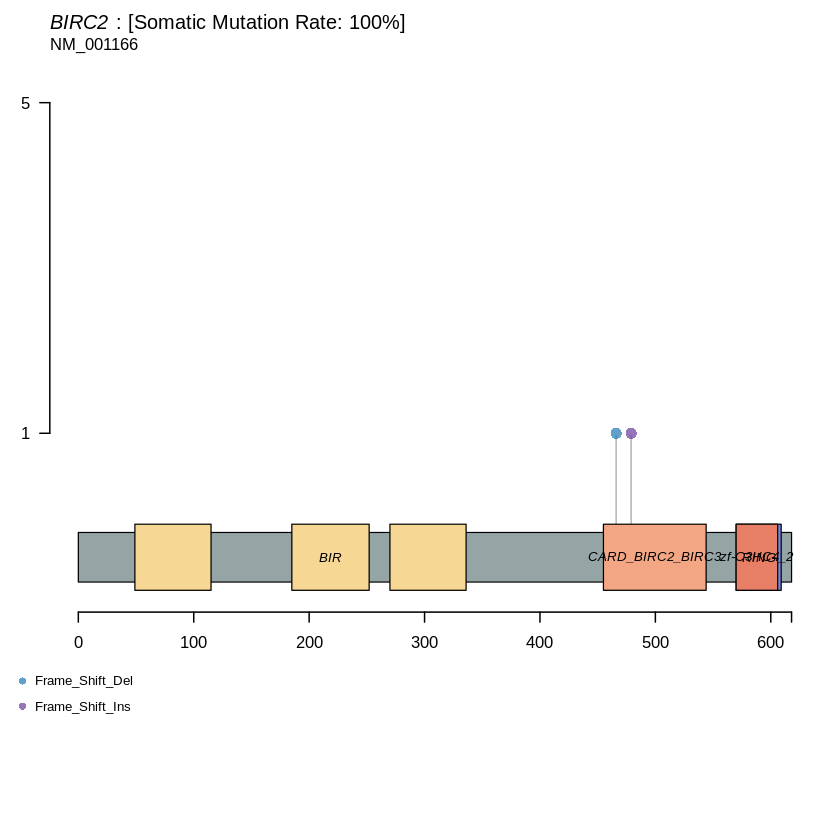

In [14]:
lollipopPlot(
  maf = maf_1,
  repel = TRUE,
  gene = 'BIRC2',
  AACol = 'Protein_Change',
  showMutationRate = TRUE)

In [11]:
maf_1@data %>% 
    select(Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f)

Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f
<chr>,<fct>,<fct>,<fct>,<dbl>
NFKB2,MM01,Splice_Site,DEL,0.674
BIRC3,MM01,Splice_Site,INS,0.941
BIRC2,MM01,Frame_Shift_Del,DEL,0.017
BIRC2,MM01,Frame_Shift_Ins,INS,0.043
TRAF3,MM01,Splice_Site,INS,0.964
TRAF3,MM01,Splice_Site,INS,0.856
MAP3K14,MM01,Splice_Site,DEL,0.776


In [8]:
getSampleSummary(maf_2)
getGeneSummary(maf_2)

Tumor_Sample_Barcode,Splice_Site,total
<fct>,<int>,<dbl>
MM03,2,2


Hugo_Symbol,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<dbl>,<int>,<int>
NFKB2,2,2,1,1


In [12]:
maf_2@data %>% 
    select(Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f)

Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f
<chr>,<fct>,<fct>,<fct>,<dbl>
NFKB2,MM03,Splice_Site,DEL,0.629
NFKB2,MM03,Splice_Site,DEL,0.709


In [9]:
getSampleSummary(maf_3)
getGeneSummary(maf_3)

Tumor_Sample_Barcode,Splice_Site,total
<fct>,<int>,<dbl>
MM05,4,4


Hugo_Symbol,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<dbl>,<int>,<int>
BIRC3,1,1,1,1
LTBR,1,1,1,1
MAP3K14,1,1,1,1
TRAF3,1,1,1,1


In [13]:
maf_3@data %>% 
    select(Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f)

Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f
<chr>,<fct>,<fct>,<fct>,<dbl>
BIRC3,MM05,Splice_Site,INS,0.973
LTBR,MM05,Splice_Site,INS,0.929
TRAF3,MM05,Splice_Site,INS,0.968
MAP3K14,MM05,Splice_Site,DEL,0.806


In [10]:
getSampleSummary(maf_4)
getGeneSummary(maf_4)

Tumor_Sample_Barcode,Frame_Shift_Del,Splice_Site,total
<fct>,<int>,<int>,<dbl>
MM06,1,1,2


Hugo_Symbol,Frame_Shift_Del,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<dbl>,<int>,<int>
BIRC2,1,0,1,1,1
MAP3K14,0,1,1,1,1


In [14]:
maf_4@data %>% 
    select(Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f)

Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f
<chr>,<fct>,<fct>,<fct>,<dbl>
BIRC2,MM06,Frame_Shift_Del,DEL,0.017
MAP3K14,MM06,Splice_Site,DEL,0.798


3 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



    HGNC    refseq.ID   protein.ID aa.length
1: BIRC2    NM_001166    NP_001157       618
2: BIRC2 NM_001256163 NP_001243092       618
3: BIRC2 NM_001256166 NP_001243095       569


Using longer transcript NM_001166 for now.



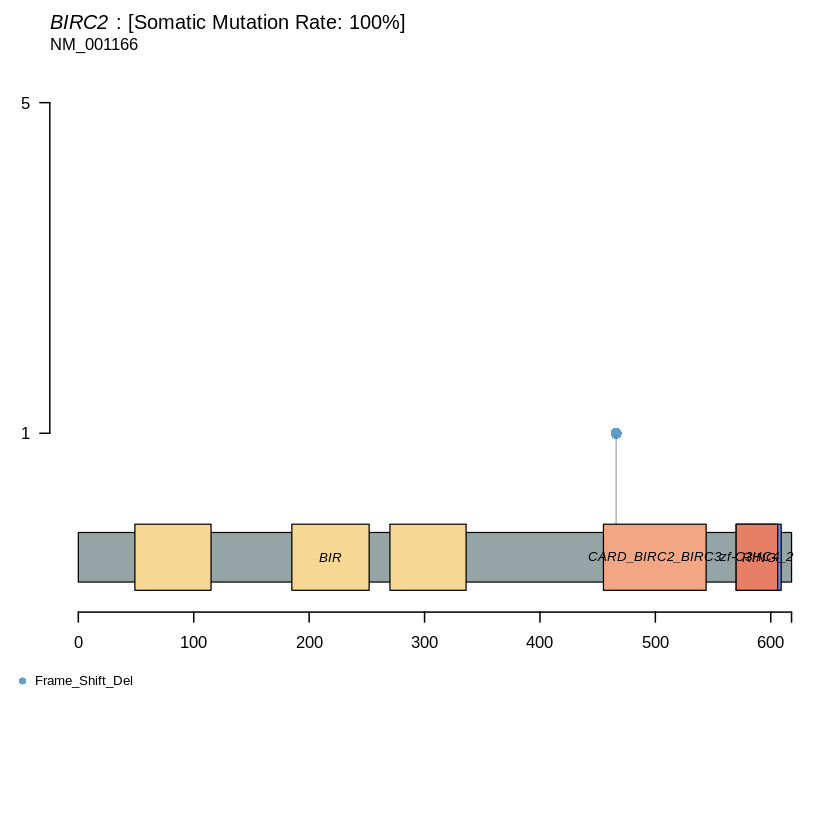

In [19]:
lollipopPlot(
  maf = maf_4,
  repel = FALSE,
  gene = 'BIRC2',
  AACol = 'Protein_Change',
  showMutationRate = TRUE)

In [11]:
getSampleSummary(maf_5)
getGeneSummary(maf_5)

Tumor_Sample_Barcode,Splice_Site,total
<fct>,<int>,<dbl>
MM07,3,3


Hugo_Symbol,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<dbl>,<int>,<int>
NFKB1,1,1,1,1
TNFRSF13B,1,1,1,1
TRAF3,1,1,1,1


In [15]:
maf_5@data %>% 
    select(Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f)

Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f
<chr>,<fct>,<fct>,<fct>,<dbl>
NFKB1,MM07,Splice_Site,INS,0.772
TRAF3,MM07,Splice_Site,INS,0.857
TNFRSF13B,MM07,Splice_Site,INS,0.863


In [12]:
getSampleSummary(maf_6)
getGeneSummary(maf_6)

Tumor_Sample_Barcode,Frame_Shift_Ins,Missense_Mutation,Splice_Site,total
<fct>,<int>,<int>,<int>,<dbl>
MM09,2,1,2,5


Hugo_Symbol,Frame_Shift_Ins,Missense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>
BIRC2,2,0,0,2,1,1
MAP3K14,0,0,1,1,1,1
NFKB2,0,0,1,1,1,1
TNFRSF13B,0,1,0,1,1,1


3 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



    HGNC    refseq.ID   protein.ID aa.length
1: BIRC2    NM_001166    NP_001157       618
2: BIRC2 NM_001256163 NP_001243092       618
3: BIRC2 NM_001256166 NP_001243095       569


Using longer transcript NM_001166 for now.



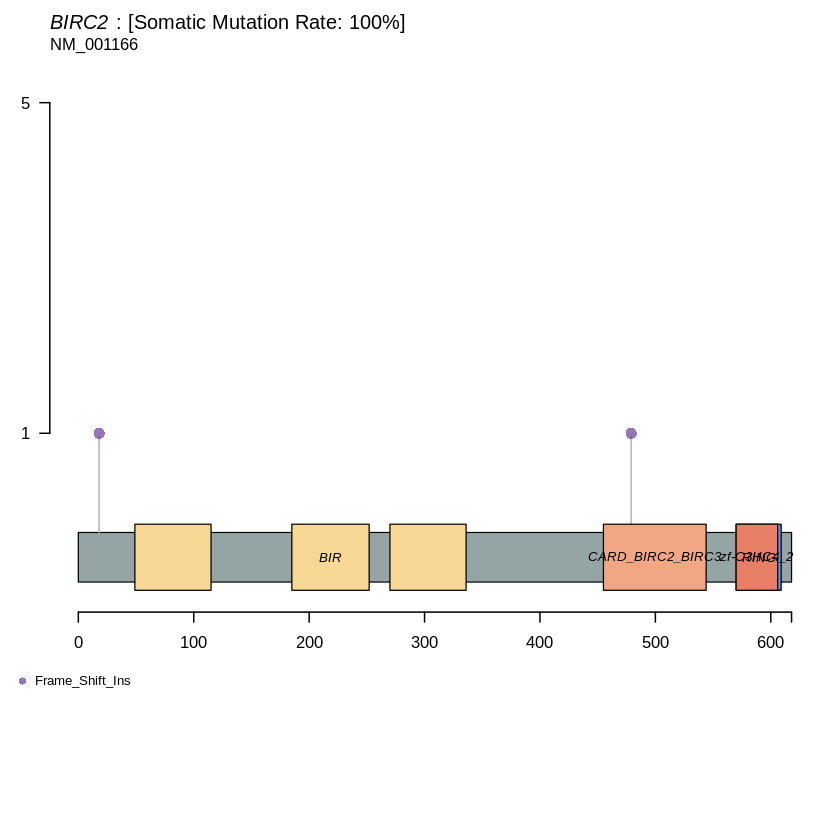

In [20]:
lollipopPlot(
  maf = maf_6,
  repel = TRUE,
  gene = 'BIRC2',
  AACol = 'Protein_Change',
  showMutationRate = TRUE)

In [13]:
getSampleSummary(maf_7)
getGeneSummary(maf_7)

Tumor_Sample_Barcode,Frame_Shift_Ins,Splice_Site,total
<fct>,<int>,<int>,<dbl>
MM10,1,3,4


Hugo_Symbol,Frame_Shift_Ins,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<dbl>,<int>,<int>
BIRC2,1,0,1,1,1
MAP3K14,0,1,1,1,1
NFKB2,0,1,1,1,1
TRAF2,0,1,1,1,1


In [16]:
maf_7@data %>% 
    select(Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f)

Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,tumor_f
<chr>,<fct>,<fct>,<fct>,<dbl>
TRAF2,MM10,Splice_Site,INS,0.962
NFKB2,MM10,Splice_Site,DEL,0.678
BIRC2,MM10,Frame_Shift_Ins,INS,0.034
MAP3K14,MM10,Splice_Site,DEL,0.817


3 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



    HGNC    refseq.ID   protein.ID aa.length
1: BIRC2    NM_001166    NP_001157       618
2: BIRC2 NM_001256163 NP_001243092       618
3: BIRC2 NM_001256166 NP_001243095       569


Using longer transcript NM_001166 for now.



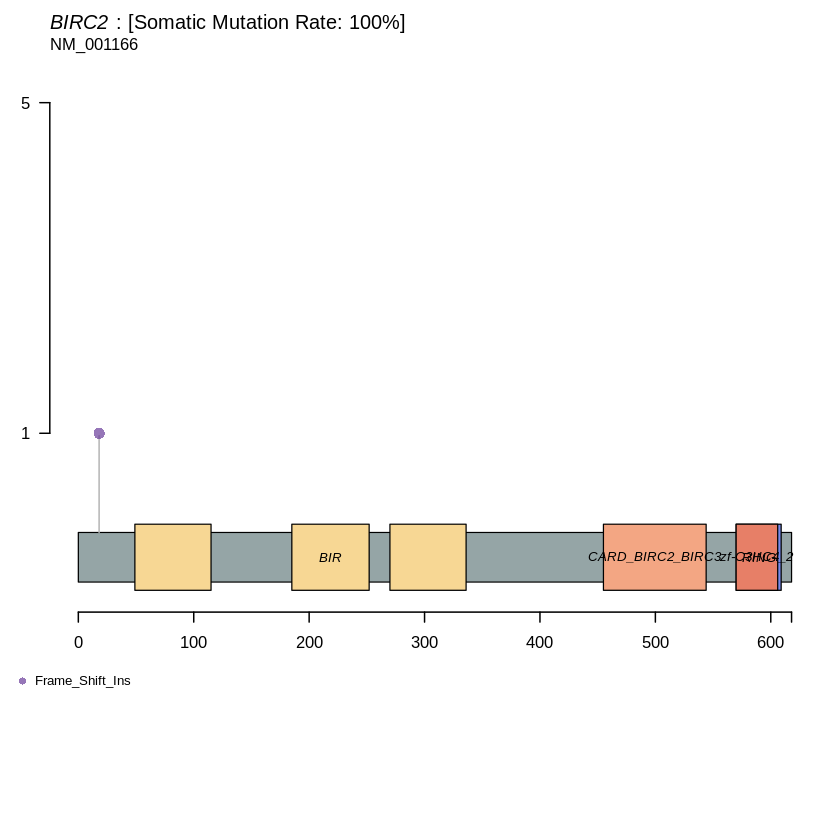

In [22]:
lollipopPlot(
  maf = maf_7,
  repel = FALSE,
  gene = 'BIRC2',
  AACol = 'Protein_Change',
  showMutationRate = TRUE)

In [25]:
#ymafs <- subsetMaf(maf = xmafs, 
#                   query = "Variant_Classification != 'Splice_Site' & Variant_Classification != 'Missense_Mutation'")
ymafs <- subsetMaf(maf = xmafs, 
                   query = "Variant_Classification != 'Splice_Site'")

-Processing clinical data


In [9]:
getSampleSummary(ymafs)
getGeneSummary(ymafs)

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Ins,Nonsense_Mutation,total
<fct>,<int>,<int>,<int>,<int>,<dbl>
MM14,1,1,0,3,5
MM23,2,0,0,1,3
MM05,1,0,1,0,2
MM09,0,1,0,1,2
MM28,0,1,0,1,2
MM06,1,0,0,0,1
MM07,1,0,0,0,1
MM12,0,0,0,1,1
MM15,0,1,0,0,1


Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Ins,Nonsense_Mutation,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
BIRC3,2,0,0,3,5,5,5
CYLD,1,2,0,3,6,3,3
BIRC2,3,0,0,0,3,3,3
TRAF3,0,2,1,0,3,3,3
NFKB2,1,1,0,1,3,2,2
MAP3K14,0,1,0,0,1,1,1
NFKB1,0,1,0,0,1,1,1
TRAF2,0,0,0,1,1,1,1


png 
  2

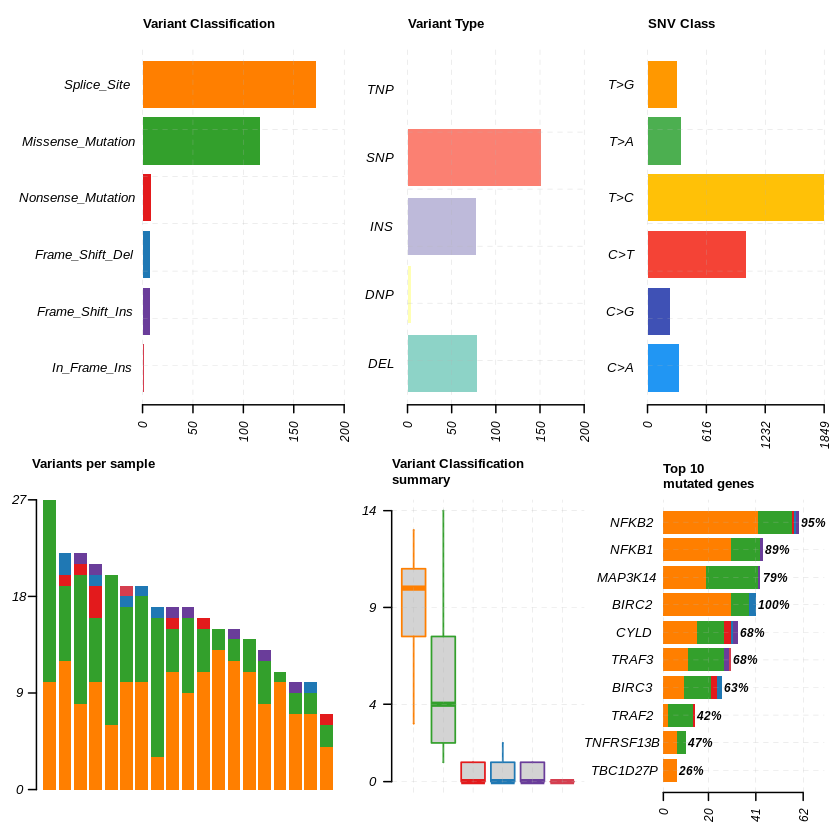

In [10]:
plotmafSummary(maf = xmafs)
pdf(file = "plot/RJVX01.FullSummary.pdf",width = 10, height = 7)
plotmafSummary(maf = xmafs, textSize = 6)
dev.off()

png 
  2

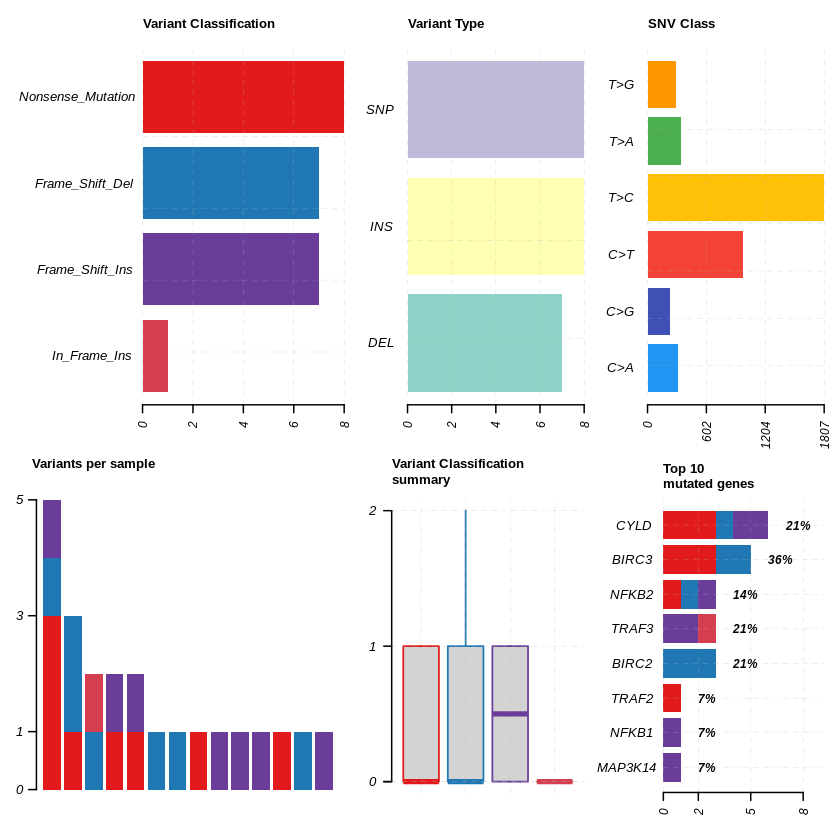

In [11]:
plotmafSummary(maf = ymafs)
pdf(file = "plot/RJVX01.Summary.pdf",width = 10, height = 7)
plotmafSummary(maf = ymafs, textSize = 6)
dev.off()

png 
  2

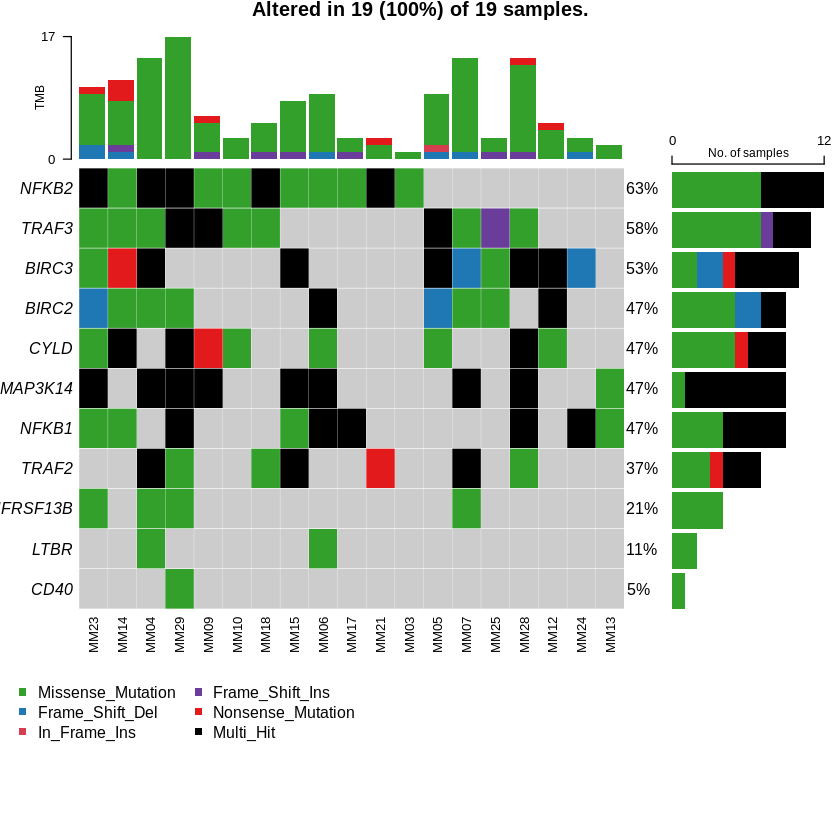

In [27]:
oncoplot(maf = ymafs, showTumorSampleBarcodes = TRUE)
pdf(file = "plot/RJVX01.FullOncoplot.pdf",width = 10, height = 7)
oncoplot(maf = ymafs, showTumorSampleBarcodes = TRUE)
dev.off()

png 
  2

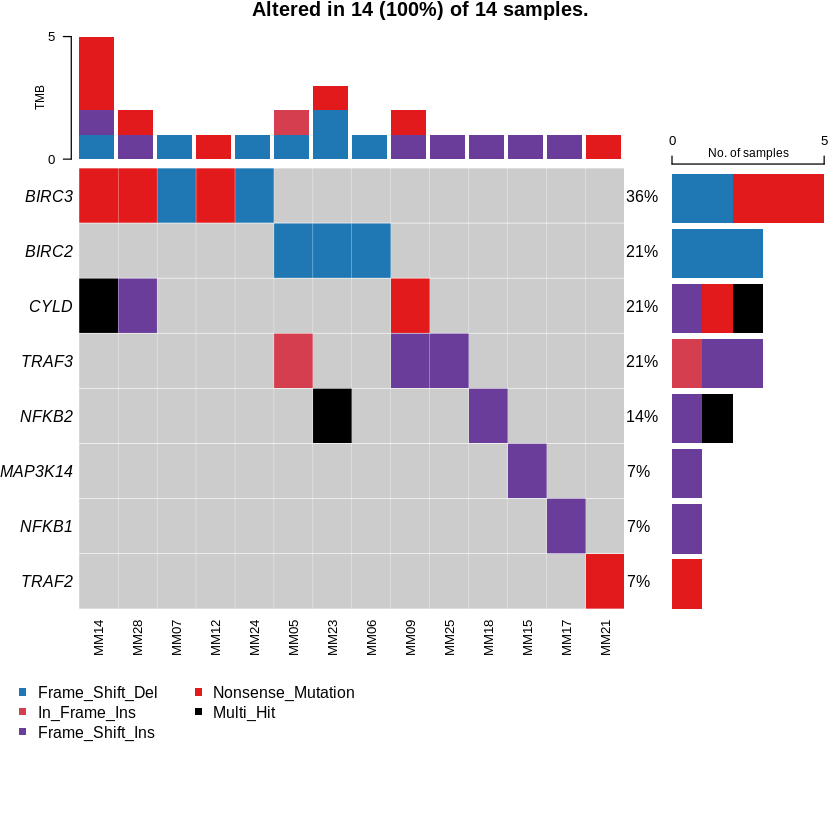

In [12]:
oncoplot(maf = ymafs, showTumorSampleBarcodes = TRUE)
pdf(file = "plot/RJVX01.Oncoplot.pdf",width = 10, height = 7)
oncoplot(maf = ymafs, showTumorSampleBarcodes = TRUE)
dev.off()

png 
  2

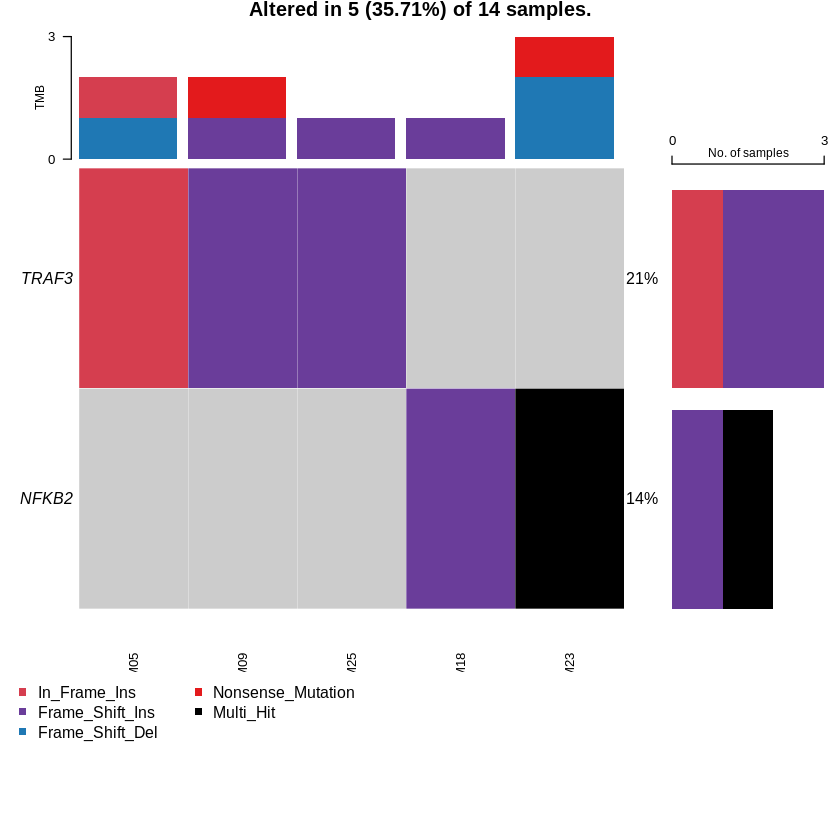

In [315]:
oncoplot(maf = ymafs, showTumorSampleBarcodes = TRUE, genes = c("TRAF3","NFKB2"))
pdf(file = "plot/RJVX01.Oncoplot_TRAF3_p52.pdf",width = 10, height = 7)
oncoplot(maf = ymafs, showTumorSampleBarcodes = TRUE, genes = c("TRAF3","NFKB2"))
dev.off()

gene1,gene2,pValue,oddsRatio,00,11,01,10,Event,pair,event_ratio
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
BIRC3,BIRC2,0.2582418,0.000000,6,0,3,5,Mutually_Exclusive,"BIRC2, BIRC3",0/8
BIRC3,TRAF3,0.2582418,0.000000,6,0,3,5,Mutually_Exclusive,"BIRC3, TRAF3",0/8
NFKB2,BIRC2,0.3956044,4.281751,10,1,2,1,Co_Occurence,"BIRC2, NFKB2",1/3
CYLD,BIRC3,0.5054945,4.648875,8,2,3,1,Co_Occurence,"BIRC3, CYLD",2/4
NFKB2,BIRC3,0.5054945,0.000000,7,0,5,2,Mutually_Exclusive,"BIRC3, NFKB2",0/7
MAP3K14,BIRC3,1.0000000,0.000000,8,0,5,1,Mutually_Exclusive,"BIRC3, MAP3K14",0/6
NFKB1,BIRC3,1.0000000,0.000000,8,0,5,1,Mutually_Exclusive,"BIRC3, NFKB1",0/6
TRAF2,BIRC3,1.0000000,0.000000,8,0,5,1,Mutually_Exclusive,"BIRC3, TRAF2",0/6
CYLD,BIRC2,1.0000000,0.000000,8,0,3,3,Mutually_Exclusive,"BIRC2, CYLD",0/6


gene1,gene2,pValue,oddsRatio,00,11,01,10,Event,pair,event_ratio
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
BIRC3,BIRC2,0.2582418,0.000000,6,0,3,5,Mutually_Exclusive,"BIRC2, BIRC3",0/8
BIRC3,TRAF3,0.2582418,0.000000,6,0,3,5,Mutually_Exclusive,"BIRC3, TRAF3",0/8
NFKB2,BIRC2,0.3956044,4.281751,10,1,2,1,Co_Occurence,"BIRC2, NFKB2",1/3
CYLD,BIRC3,0.5054945,4.648875,8,2,3,1,Co_Occurence,"BIRC3, CYLD",2/4
NFKB2,BIRC3,0.5054945,0.000000,7,0,5,2,Mutually_Exclusive,"BIRC3, NFKB2",0/7
MAP3K14,BIRC3,1.0000000,0.000000,8,0,5,1,Mutually_Exclusive,"BIRC3, MAP3K14",0/6
NFKB1,BIRC3,1.0000000,0.000000,8,0,5,1,Mutually_Exclusive,"BIRC3, NFKB1",0/6
TRAF2,BIRC3,1.0000000,0.000000,8,0,5,1,Mutually_Exclusive,"BIRC3, TRAF2",0/6
CYLD,BIRC2,1.0000000,0.000000,8,0,3,3,Mutually_Exclusive,"BIRC2, CYLD",0/6


png 
  2

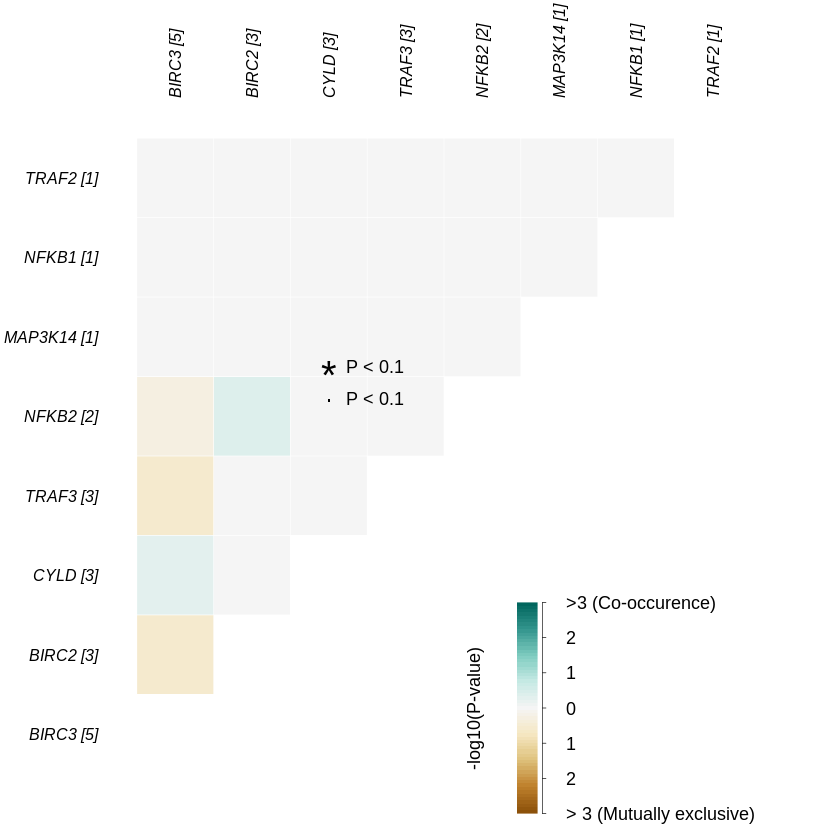

In [314]:
somaticInteractions(maf = ymafs, top = 25, pvalue = 0.1)
pdf(file = "plot/RJVX01.Interactions.pdf",width = 10, height = 7)
somaticInteractions(maf = ymafs, top = 25, pvalue = 0.1)
dev.off()

3 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



    HGNC    refseq.ID   protein.ID aa.length
1: NFKB2 NM_001077494 NP_001070962       900
2: NFKB2 NM_001261403 NP_001248332       899
3: NFKB2    NM_002502    NP_002493       899


Using longer transcript NM_001077494 for now.

3 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



    HGNC    refseq.ID   protein.ID aa.length
1: NFKB2 NM_001077494 NP_001070962       900
2: NFKB2 NM_001261403 NP_001248332       899
3: NFKB2    NM_002502    NP_002493       899


Using longer transcript NM_001077494 for now.



png 
  2

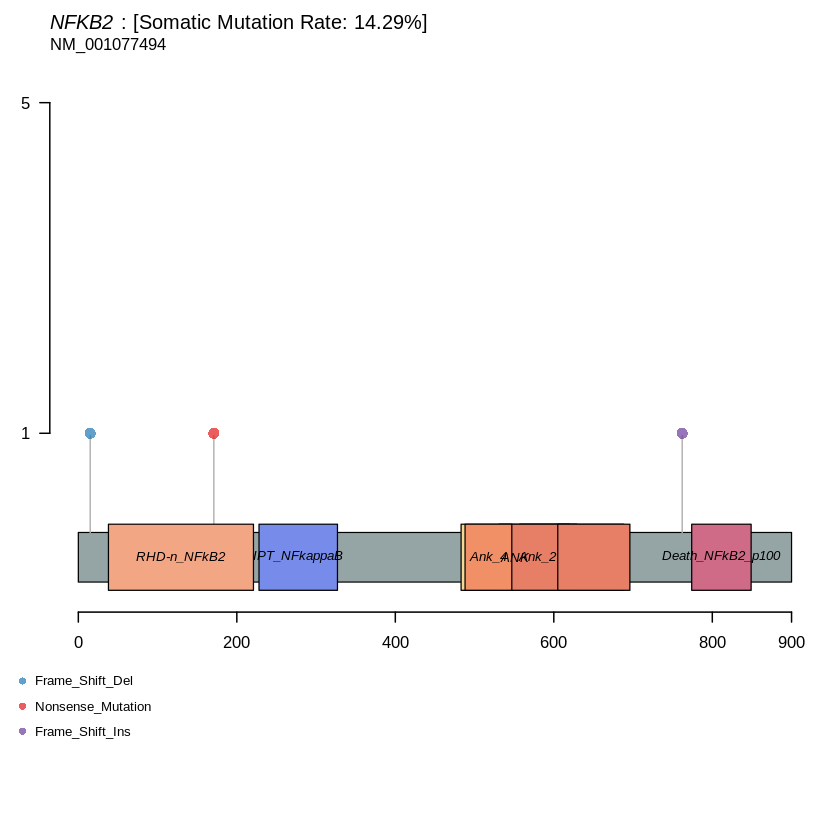

In [323]:
lollipopPlot(
  maf = ymafs,
  repel = TRUE,
  gene = 'NFKB2',
  AACol = 'Protein_Change',
  showMutationRate = TRUE)
pdf(file = "plot/RJVX01.Lollipop_NFKB2.pdf",width = 16, height = 9)
lollipopPlot(
  maf = ymafs,
  repel = TRUE,
  gene = 'NFKB2',
  AACol = 'Protein_Change',
  showMutationRate = TRUE)
dev.off()

4 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



    HGNC    refseq.ID   protein.ID aa.length
1: TRAF3 NM_001199427 NP_001186356       485
2: TRAF3    NM_003300    NP_003291       568
3: TRAF3    NM_145725    NP_663777       568
4: TRAF3    NM_145726    NP_663778       543


Using longer transcript NM_003300 for now.

4 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



    HGNC    refseq.ID   protein.ID aa.length
1: TRAF3 NM_001199427 NP_001186356       485
2: TRAF3    NM_003300    NP_003291       568
3: TRAF3    NM_145725    NP_663777       568
4: TRAF3    NM_145726    NP_663778       543


Using longer transcript NM_003300 for now.



png 
  2

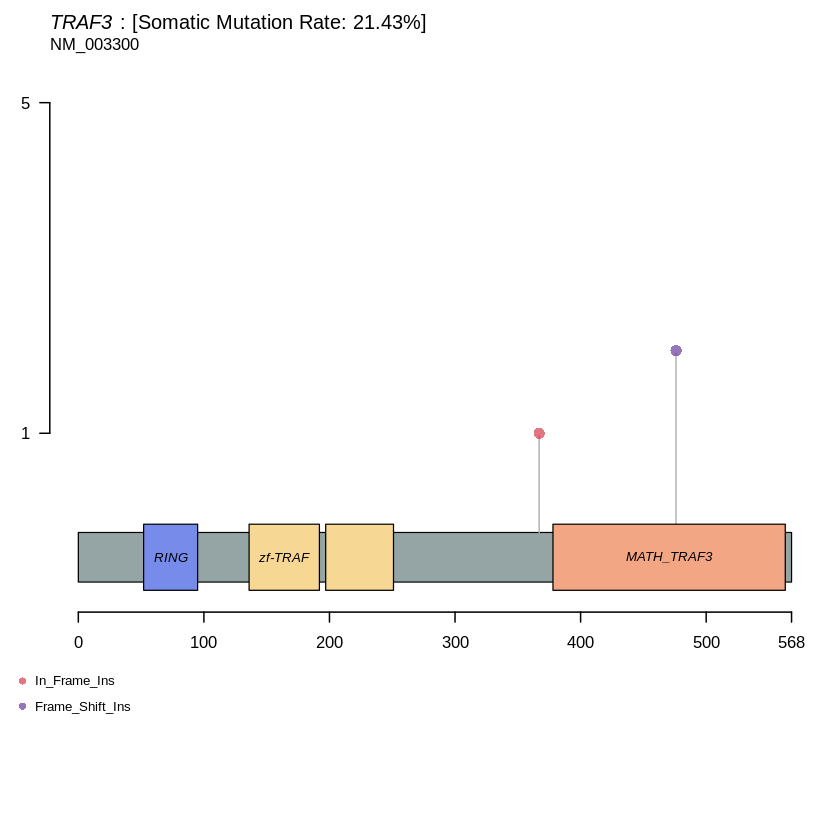

In [324]:
lollipopPlot(
  maf = ymafs,
  repel = TRUE,
  gene = 'TRAF3',
  AACol = 'Protein_Change',
  showMutationRate = TRUE)
pdf(file = "plot/RJVX01.Lollipop_TRAF3.pdf",width = 16, height = 9)
lollipopPlot(
  maf = ymafs,
  repel = TRUE,
  gene = 'TRAF3',
  AACol = 'Protein_Change',
  showMutationRate = TRUE)
dev.off()

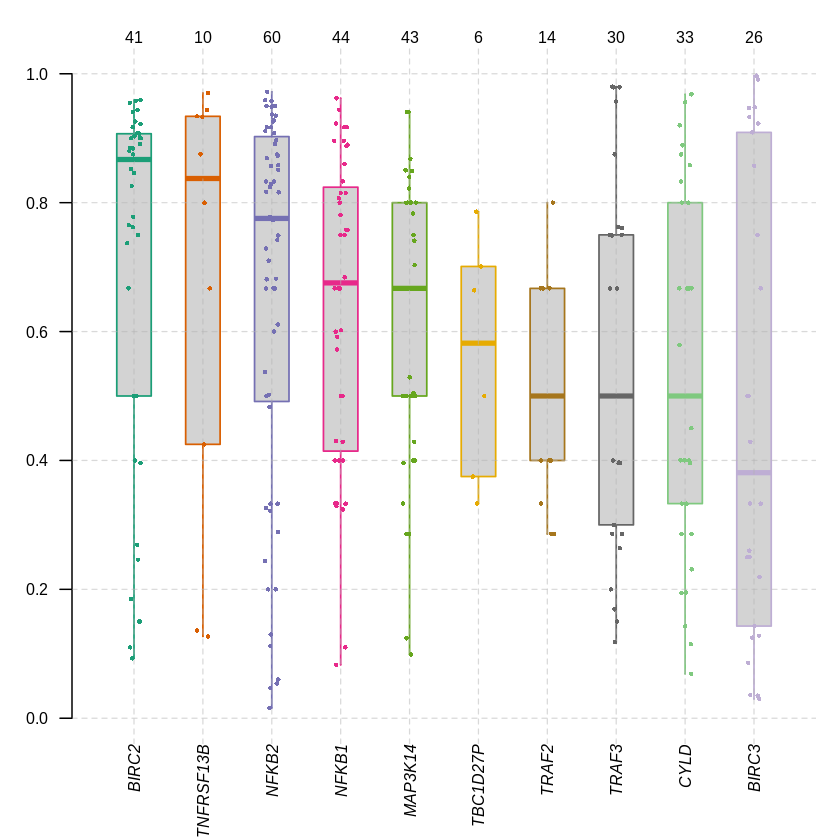

In [325]:
plotVaf(maf = xmafs, vafCol = 'tumor_f')

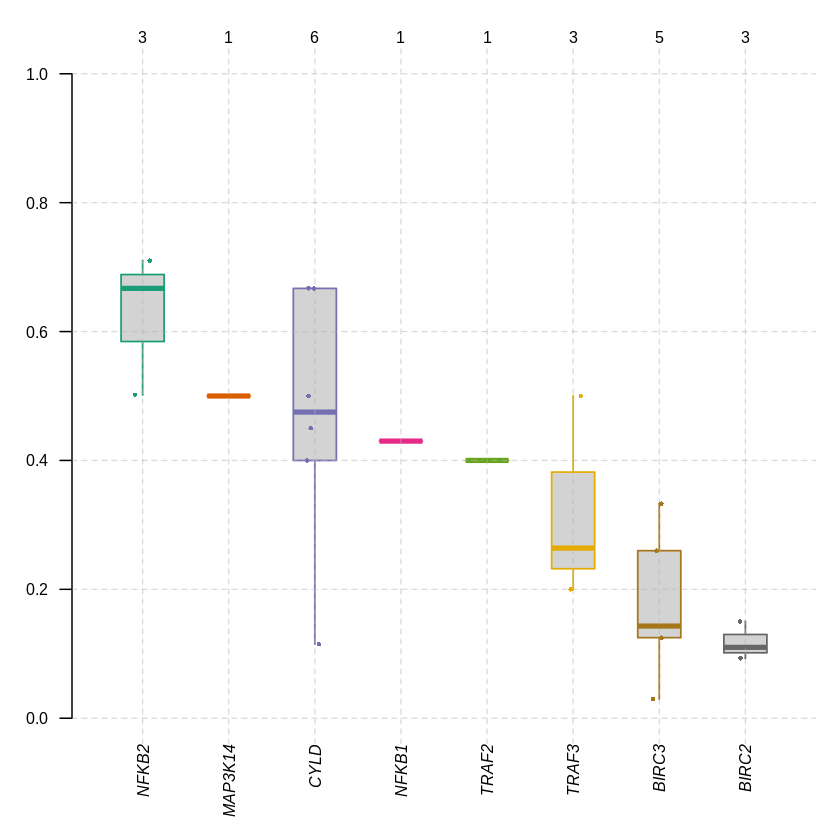

In [326]:
plotVaf(maf = ymafs, vafCol = 'tumor_f')

In [31]:
#ymafs <- subsetMaf(maf = xmafs, query = "(Variant_Classification == 'Frame_Shift_Del' | Variant_Classification == 'Frame_Shift_Ins') & tumor_f >= 0.5")

-Processing clinical data


In [106]:
#ymafs <- subsetMaf(maf = xmafs, query = "tumor_f >= 0.5")

-Processing clinical data


HGNC,AAPos,Variant_Classification,N,total,fraction,DomainLabel,pfam,Description
<chr>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
BIRC2,527,Frame_Shift_Del,2,3,0.6666667,CARD_BIRC2_BIRC3,cd08329,"Caspase activation and recruitment domain found in Baculoviral IAP repeat-containing proteins, BIRC2 (c-IAP1) and BIRC3 (c-IAP2)"
TRAF3,476,Frame_Shift_Ins,2,3,0.6666667,MATH_TRAF3,TRAF molecules serve as adapter proteins that link TNFRs and downstream kinase cascades resulting in the activation of transcription factors and the...,"Tumor Necrosis Factor Receptor (TNFR)-Associated Factor (TRAF) family, TRAF3 subfamily, TRAF domain"
BIRC2,544,Frame_Shift_Del,1,3,0.3333333,CARD_BIRC2_BIRC3,cd08329,"Caspase activation and recruitment domain found in Baculoviral IAP repeat-containing proteins, BIRC2 (c-IAP1) and BIRC3 (c-IAP2)"
BIRC3,295,Frame_Shift_Del,1,5,0.2000000,BIR,"Found in inhibitors of apoptosis proteins (IAPs) and other proteins. In higher eukaryotes, BIR domains inhibit apoptosis by acting as direct inhibitors of the caspase family of protease enzymes",Baculoviral inhibition of apoptosis protein repeat domain
BIRC3,494,Nonsense_Mutation,1,5,0.2000000,CARD_BIRC2_BIRC3,cd08329,"Caspase activation and recruitment domain found in Baculoviral IAP repeat-containing proteins, BIRC2 (c-IAP1) and BIRC3 (c-IAP2)"
BIRC3,294,Nonsense_Mutation,1,5,0.2000000,BIR,"Found in inhibitors of apoptosis proteins (IAPs) and other proteins. In higher eukaryotes, BIR domains inhibit apoptosis by acting as direct inhibitors of the caspase family of protease enzymes",Baculoviral inhibition of apoptosis protein repeat domain
CYLD,906,Nonsense_Mutation,1,6,0.1666667,Peptidase_C19N,cd02670,A subfamily of Peptidase C19. Peptidase C19 contains ubiquitinyl hydrolases. They are intracellular peptidases that remove ubiquitin molecules from polyubiquinated peptides by cleavage of isopeptide bonds. They hydrolyze bonds involving the carboxyl...
CYLD,184,Nonsense_Mutation,1,6,0.1666667,CAP_GLY,smart01052,Cytoskeleton-associated proteins (CAPs) are involved in the organisation of microtubules and transportation of vesicles and organelles along the cytoskeletal network
CYLD,257,Nonsense_Mutation,1,6,0.1666667,CAP_GLY,pfam01302,CAP-Gly domain


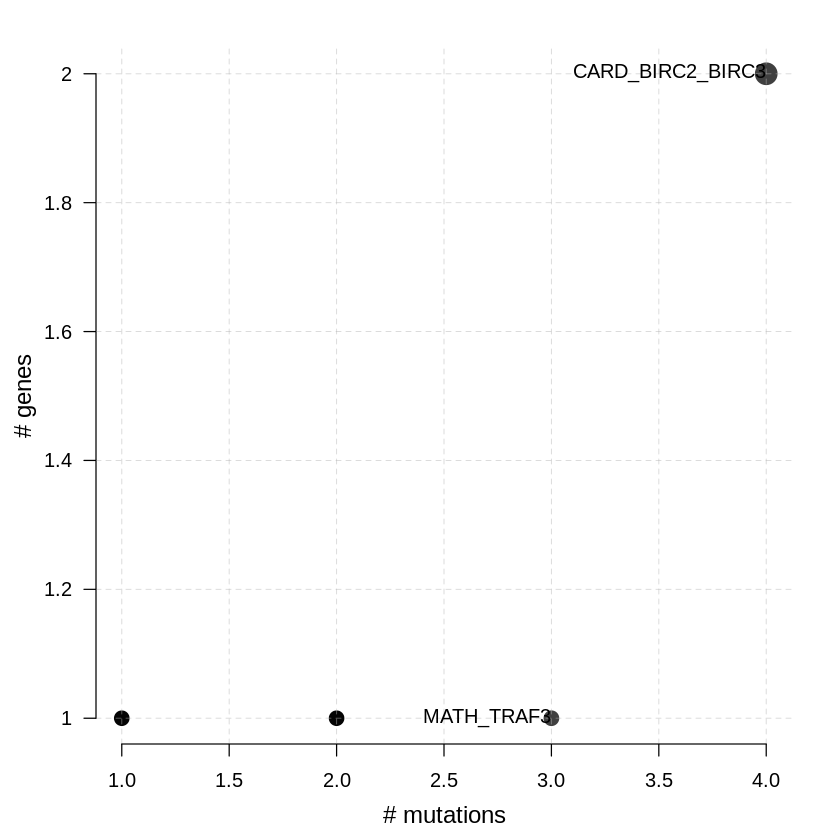

In [327]:
pfamDomains(maf = ymafs, AACol = 'Protein_Change', top = 2, summarizeBy = "AAPos")

In [328]:
clinEnrich = clinicalEnrichment(maf = ymafs, annotationDat = xclin, clinicalFeature = "class", minMut = 0)

Sample size per factor in class:




 0  1 
 7 12 


In [298]:
clinEnrich

Hugo_Symbol,Feature_1,Feature_2,n_mutated_Feature1,n_mutated_Feature2,fdr
<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>
MAP3K14,1,0,11 of 12,4 of 7,0.1173891
CD40,1,0,0 of 12,2 of 7,0.1228070
TBC1D27P,1,0,2 of 12,3 of 7,0.3046956
TRAF3,1,0,7 of 12,6 of 7,0.3330753
NFKB2,1,0,12 of 12,6 of 7,0.3684211
TRAF2,1,0,4 of 12,4 of 7,0.3765182
TNFRSF13B,1,0,5 of 12,4 of 7,0.6499166
BIRC3,1,0,7 of 12,5 of 7,0.6561681
NFKB1,1,0,11 of 12,6 of 7,1.0000000


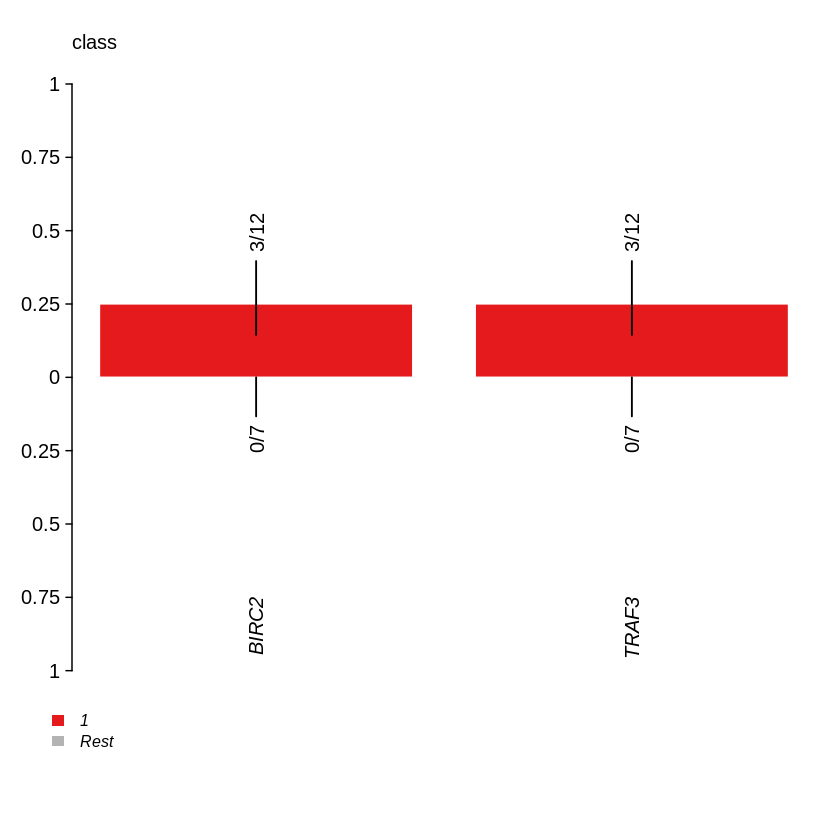

In [329]:
plotEnrichmentResults(enrich_res = clinEnrich, pVal = 0.3, geneFontSize = 1, annoFontSize = 1)